In [1]:
# OS
import sys

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 
import pandas_profiling as pp

# SEABORN
import seaborn as sns

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import StandardScaler # normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # imputation
from sklearn.impute import KNNImputer 


# SCHIKIT-LEARN: MODELES
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet

# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyper_paramètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE
from sklearn.pipeline import make_pipeline

## EVALUATION: COURBE ROC
from sklearn.metrics import auc # aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

# Chargement des données

In [2]:
import os
Bad_payers = pd.read_excel('credit.xls')

# Description des données

In [3]:
Bad_payers.head(10)

,ID,X1: LIMIT_BAL,X2: SEX,X3: EDUCATION,X4: MARRIAGE,X5: AGE,X6: PAY_1,X7: PAY_2,X8: PAY_3,X9: PAY_4,X10: PAY_5,X11: PAY_6,X12: BILL_AMT1,X13: BILL_AMT2,X14: BILL_AMT3,X15: BILL_AMT4,X16: BILL_AMT5,X17: BILL_AMT6,X18: PAY_AMT1,X19: PAY_AMT2,X20: PAY_AMT3,X21: PAY_AMT4,X22: PAY_AMT5,X23: PAY_AMT6,Y: default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
Bad_payers.tail(3)

,ID,X1: LIMIT_BAL,X2: SEX,X3: EDUCATION,X4: MARRIAGE,X5: AGE,X6: PAY_1,X7: PAY_2,X8: PAY_3,X9: PAY_4,X10: PAY_5,X11: PAY_6,X12: BILL_AMT1,X13: BILL_AMT2,X14: BILL_AMT3,X15: BILL_AMT4,X16: BILL_AMT5,X17: BILL_AMT6,X18: PAY_AMT1,X19: PAY_AMT2,X20: PAY_AMT3,X21: PAY_AMT4,X22: PAY_AMT5,X23: PAY_AMT6,Y: default payment next month
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
Bad_payers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   ID                             30000 non-null  int64
 1   X1: LIMIT_BAL                  30000 non-null  int64
 2   X2: SEX                        30000 non-null  int64
 3   X3: EDUCATION                  30000 non-null  int64
 4   X4: MARRIAGE                   30000 non-null  int64
 5   X5: AGE                        30000 non-null  int64
 6   X6: PAY_1                      30000 non-null  int64
 7   X7: PAY_2                      30000 non-null  int64
 8   X8: PAY_3                      30000 non-null  int64
 9   X9: PAY_4                      30000 non-null  int64
 10  X10: PAY_5                     30000 non-null  int64
 11  X11: PAY_6                     30000 non-null  int64
 12  X12: BILL_AMT1                 30000 non-null  int64
 13  X13: BILL_AMT2  

In [6]:
Bad_payers.columns

Index(['ID', 'X1: LIMIT_BAL', 'X2: SEX', 'X3: EDUCATION', 'X4: MARRIAGE',
       'X5: AGE', 'X6: PAY_1', 'X7: PAY_2', 'X8: PAY_3', 'X9: PAY_4',
       'X10: PAY_5', 'X11: PAY_6', 'X12: BILL_AMT1', 'X13: BILL_AMT2',
       'X14: BILL_AMT3', 'X15: BILL_AMT4', 'X16: BILL_AMT5', 'X17: BILL_AMT6',
       'X18: PAY_AMT1', 'X19: PAY_AMT2', 'X20: PAY_AMT3', 'X21: PAY_AMT4',
       'X22: PAY_AMT5', 'X23: PAY_AMT6', 'Y: default payment next month'],
      dtype='object')

In [7]:
del Bad_payers["ID"]

# Analyse exploratoire

In [8]:
duplicate_pay = Bad_payers[Bad_payers.duplicated()]
duplicate_pay

,X1: LIMIT_BAL,X2: SEX,X3: EDUCATION,X4: MARRIAGE,X5: AGE,X6: PAY_1,X7: PAY_2,X8: PAY_3,X9: PAY_4,X10: PAY_5,X11: PAY_6,X12: BILL_AMT1,X13: BILL_AMT2,X14: BILL_AMT3,X15: BILL_AMT4,X16: BILL_AMT5,X17: BILL_AMT6,X18: PAY_AMT1,X19: PAY_AMT2,X20: PAY_AMT3,X21: PAY_AMT4,X22: PAY_AMT5,X23: PAY_AMT6,Y: default payment next month
1980,150000,2,1,1,38,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
4585,150000,2,1,1,31,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
6022,210000,2,1,2,39,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
6466,210000,2,2,1,49,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
7319,500000,1,1,1,43,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
8320,360000,1,2,1,41,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
10250,50000,1,2,2,26,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
13106,360000,2,1,1,49,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
14294,20000,1,2,2,24,2,2,4,4,4,4,1650,1650,1650,1650,1650,1650,0,0,0,0,0,0,1
15458,160000,1,2,2,28,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# pp.ProfileReport(Bad_payers)

In [10]:
Bad_payers.isna().sum()

X1: LIMIT_BAL                    0
X2: SEX                          0
X3: EDUCATION                    0
X4: MARRIAGE                     0
X5: AGE                          0
X6: PAY_1                        0
X7: PAY_2                        0
X8: PAY_3                        0
X9: PAY_4                        0
X10: PAY_5                       0
X11: PAY_6                       0
X12: BILL_AMT1                   0
X13: BILL_AMT2                   0
X14: BILL_AMT3                   0
X15: BILL_AMT4                   0
X16: BILL_AMT5                   0
X17: BILL_AMT6                   0
X18: PAY_AMT1                    0
X19: PAY_AMT2                    0
X20: PAY_AMT3                    0
X21: PAY_AMT4                    0
X22: PAY_AMT5                    0
X23: PAY_AMT6                    0
Y: default payment next month    0
dtype: int64

In [11]:
Bad_payers.isnull().sum()

X1: LIMIT_BAL                    0
X2: SEX                          0
X3: EDUCATION                    0
X4: MARRIAGE                     0
X5: AGE                          0
X6: PAY_1                        0
X7: PAY_2                        0
X8: PAY_3                        0
X9: PAY_4                        0
X10: PAY_5                       0
X11: PAY_6                       0
X12: BILL_AMT1                   0
X13: BILL_AMT2                   0
X14: BILL_AMT3                   0
X15: BILL_AMT4                   0
X16: BILL_AMT5                   0
X17: BILL_AMT6                   0
X18: PAY_AMT1                    0
X19: PAY_AMT2                    0
X20: PAY_AMT3                    0
X21: PAY_AMT4                    0
X22: PAY_AMT5                    0
X23: PAY_AMT6                    0
Y: default payment next month    0
dtype: int64

In [12]:
# Il n'y a pas de données manquantes dans ce dataset

# Reformatage du Dataset

In [13]:
Bad_payers.columns

Index(['X1: LIMIT_BAL', 'X2: SEX', 'X3: EDUCATION', 'X4: MARRIAGE', 'X5: AGE',
       'X6: PAY_1', 'X7: PAY_2', 'X8: PAY_3', 'X9: PAY_4', 'X10: PAY_5',
       'X11: PAY_6', 'X12: BILL_AMT1', 'X13: BILL_AMT2', 'X14: BILL_AMT3',
       'X15: BILL_AMT4', 'X16: BILL_AMT5', 'X17: BILL_AMT6', 'X18: PAY_AMT1',
       'X19: PAY_AMT2', 'X20: PAY_AMT3', 'X21: PAY_AMT4', 'X22: PAY_AMT5',
       'X23: PAY_AMT6', 'Y: default payment next month'],
      dtype='object')

In [14]:
labels = ['X1: LIMIT_BAL',
'X5: AGE',
'X17: BILL_AMT6',
'X16: BILL_AMT5',
'X15: BILL_AMT4',
'X14: BILL_AMT3',
'X13: BILL_AMT2',
'X12: BILL_AMT1',
'X23: PAY_AMT6',
'X22: PAY_AMT5',
'X21: PAY_AMT4',
'X20: PAY_AMT3',
'X19: PAY_AMT2',
'X18: PAY_AMT1']
for i in labels :
    Bad_payers[i] = Bad_payers[i].astype(float, errors = 'raise')
Bad_payers.dtypes
# On passe le varibles continues en float pour la suite

X1: LIMIT_BAL                    float64
X2: SEX                            int64
X3: EDUCATION                      int64
X4: MARRIAGE                       int64
X5: AGE                          float64
X6: PAY_1                          int64
X7: PAY_2                          int64
X8: PAY_3                          int64
X9: PAY_4                          int64
X10: PAY_5                         int64
X11: PAY_6                         int64
X12: BILL_AMT1                   float64
X13: BILL_AMT2                   float64
X14: BILL_AMT3                   float64
X15: BILL_AMT4                   float64
X16: BILL_AMT5                   float64
X17: BILL_AMT6                   float64
X18: PAY_AMT1                    float64
X19: PAY_AMT2                    float64
X20: PAY_AMT3                    float64
X21: PAY_AMT4                    float64
X22: PAY_AMT5                    float64
X23: PAY_AMT6                    float64
Y: default payment next month      int64
dtype: object

In [15]:
Bad_payers = Bad_payers[['X1: LIMIT_BAL',
'X2: SEX',
'X3: EDUCATION',
'X4: MARRIAGE',
'X5: AGE',
'X11: PAY_6',
'X10: PAY_5',
'X9: PAY_4',
'X8: PAY_3',
'X7: PAY_2',
'X6: PAY_1',
'X17: BILL_AMT6',
'X16: BILL_AMT5',
'X15: BILL_AMT4',
'X14: BILL_AMT3',
'X13: BILL_AMT2',
'X12: BILL_AMT1',
'X23: PAY_AMT6',
'X22: PAY_AMT5',
'X21: PAY_AMT4',
'X20: PAY_AMT3',
'X19: PAY_AMT2',
'X18: PAY_AMT1',
'Y: default payment next month']]

In [16]:
Bad_payers.head(10)

,X1: LIMIT_BAL,X2: SEX,X3: EDUCATION,X4: MARRIAGE,X5: AGE,X11: PAY_6,X10: PAY_5,X9: PAY_4,X8: PAY_3,X7: PAY_2,X6: PAY_1,X17: BILL_AMT6,X16: BILL_AMT5,X15: BILL_AMT4,X14: BILL_AMT3,X13: BILL_AMT2,X12: BILL_AMT1,X23: PAY_AMT6,X22: PAY_AMT5,X21: PAY_AMT4,X20: PAY_AMT3,X19: PAY_AMT2,X18: PAY_AMT1,Y: default payment next month
0,20000.0,2,2,1,24.0,-2,-2,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,120000.0,2,2,2,26.0,2,0,0,0,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,0,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,50000.0,1,2,1,57.0,0,0,0,-1,0,-1,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0
5,50000.0,1,1,2,37.0,0,0,0,0,0,0,20024.0,19619.0,19394.0,57608.0,57069.0,64400.0,800.0,1000.0,1000.0,657.0,1815.0,2500.0,0
6,500000.0,1,1,2,29.0,0,0,0,0,0,0,473944.0,483003.0,542653.0,445007.0,412023.0,367965.0,13770.0,13750.0,20239.0,38000.0,40000.0,55000.0,0
7,100000.0,2,2,2,23.0,-1,0,0,-1,-1,0,567.0,-159.0,221.0,601.0,380.0,11876.0,1542.0,1687.0,581.0,0.0,601.0,380.0,0
8,140000.0,2,3,1,28.0,0,0,0,2,0,0,3719.0,11793.0,12211.0,12108.0,14096.0,11285.0,1000.0,1000.0,1000.0,432.0,0.0,3329.0,0
9,20000.0,1,3,2,35.0,-1,-1,-2,-2,-2,-2,13912.0,13007.0,0.0,0.0,0.0,0.0,0.0,1122.0,13007.0,0.0,0.0,0.0,0


In [17]:
months = ["April", "May", "June", "July", "August", "September"]
labels = ['X11: PAY_6', 'X10: PAY_5', 'X9: PAY_4', 'X8: PAY_3', 'X7: PAY_2', 'X6: PAY_1']
for i,j in zip(months, labels) :
    Bad_payers.rename(columns = {j:"Delay " + i}, inplace = True)

In [18]:
labels = ['X17: BILL_AMT6','X16: BILL_AMT5','X15: BILL_AMT4','X14: BILL_AMT3','X13: BILL_AMT2','X12: BILL_AMT1']
for i,j in zip(months, labels) :
    Bad_payers.rename(columns = {j:"Bill " + i}, inplace = True)

In [19]:
labels = ['X23: PAY_AMT6','X22: PAY_AMT5','X21: PAY_AMT4','X20: PAY_AMT3','X19: PAY_AMT2','X18: PAY_AMT1']
for i,j in zip(months, labels) :
    Bad_payers.rename(columns = {j:"Payment " + i}, inplace = True) 
# On décide de réorganiser dans l'ordre chronologique et d'ajouter des labels plus parlants

In [20]:
Bad_payers.head(10)

,X1: LIMIT_BAL,X2: SEX,X3: EDUCATION,X4: MARRIAGE,X5: AGE,Delay April,Delay May,Delay June,Delay July,Delay August,Delay September,Bill April,Bill May,Bill June,Bill July,Bill August,Bill September,Payment April,Payment May,Payment June,Payment July,Payment August,Payment September,Y: default payment next month
0,20000.0,2,2,1,24.0,-2,-2,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,120000.0,2,2,2,26.0,2,0,0,0,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,0,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,50000.0,1,2,1,57.0,0,0,0,-1,0,-1,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0
5,50000.0,1,1,2,37.0,0,0,0,0,0,0,20024.0,19619.0,19394.0,57608.0,57069.0,64400.0,800.0,1000.0,1000.0,657.0,1815.0,2500.0,0
6,500000.0,1,1,2,29.0,0,0,0,0,0,0,473944.0,483003.0,542653.0,445007.0,412023.0,367965.0,13770.0,13750.0,20239.0,38000.0,40000.0,55000.0,0
7,100000.0,2,2,2,23.0,-1,0,0,-1,-1,0,567.0,-159.0,221.0,601.0,380.0,11876.0,1542.0,1687.0,581.0,0.0,601.0,380.0,0
8,140000.0,2,3,1,28.0,0,0,0,2,0,0,3719.0,11793.0,12211.0,12108.0,14096.0,11285.0,1000.0,1000.0,1000.0,432.0,0.0,3329.0,0
9,20000.0,1,3,2,35.0,-1,-1,-2,-2,-2,-2,13912.0,13007.0,0.0,0.0,0.0,0.0,0.0,1122.0,13007.0,0.0,0.0,0.0,0


In [21]:
Bad_payers = Bad_payers.drop_duplicates() 
#Les valeurs dupliquées sont peu interressantes, car les sommes à rembourser et remboursées sont souvent vides

# Variable cible

In [22]:
Bad_payers["Y: default payment next month"]

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
30       0
31       1
32       0
33       0
34       0
35       0
36       0
37       0
38       1
39       0
40       0
41       0
42       0
43       0
44       0
45       1
46       1
47       1
48       0
49       0
50       1
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       1
61       0
62       1
63       1
64       0
65       1
66       1
67       0
68       0
69       0
70       0
71       1
72       0
73       0
74       0
75       0
76       0
77       0
78       1
79       1
80       0
81       0
82       1
83       0
84       0
85       0
86       1
87       0
88       0
89       0
90       1

In [23]:
# La variable cible est de type catégorielle (booléenne)

In [24]:
Bad_payers["Y: default payment next month"].value_counts()

0    23335
1     6630
Name: Y: default payment next month, dtype: int64

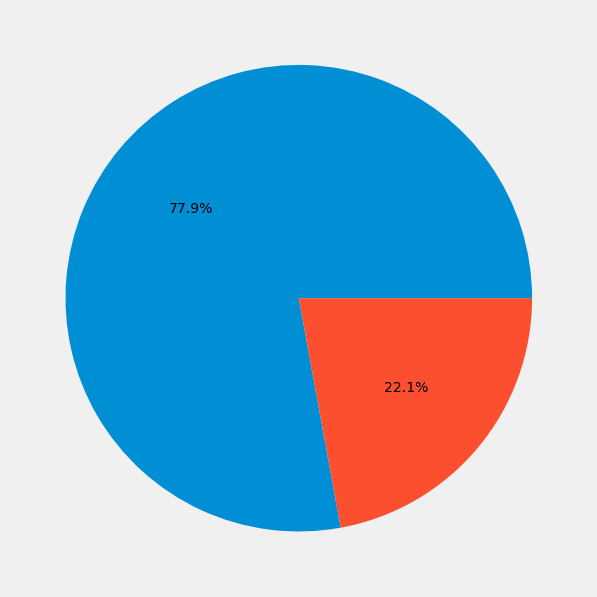

In [25]:
plt.figure(figsize=(18, 10))
plt.pie(Bad_payers["Y: default payment next month"].value_counts(), autopct='%1.1f%%')
plt.show()

In [26]:
# La variable cible est déséquilibrée

# Analyse univariée

In [27]:
Bad_payers.dtypes.value_counts()

float64    14
int64      10
dtype: int64

2    18091
1    11874
Name: X2: SEX, dtype: int64


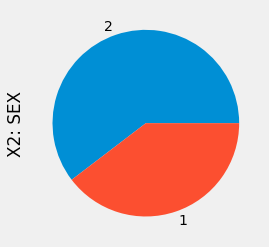

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: X3: EDUCATION, dtype: int64


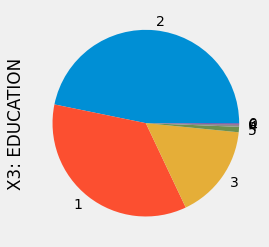

2    15945
1    13643
3      323
0       54
Name: X4: MARRIAGE, dtype: int64


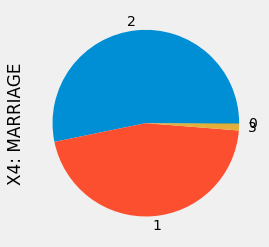

 0    16286
-1     5736
-2     4865
 2     2766
 3      184
 4       48
 7       46
 6       19
 5       13
 8        2
Name: Delay April, dtype: int64


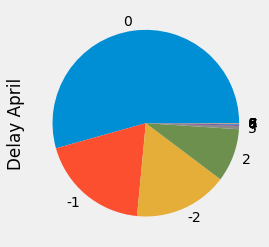

 0    16947
-1     5535
-2     4516
 2     2626
 3      178
 4       83
 7       58
 5       17
 6        4
 8        1
Name: Delay May, dtype: int64


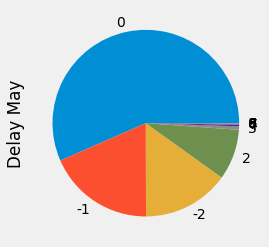

 0    16455
-1     5683
-2     4318
 2     3159
 3      180
 4       68
 7       58
 5       35
 6        5
 8        2
 1        2
Name: Delay June, dtype: int64


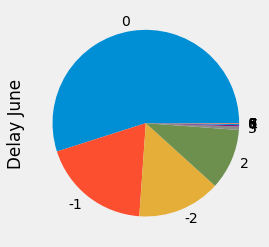

 0    15764
-1     5934
-2     4055
 2     3819
 3      240
 4       75
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Delay July, dtype: int64


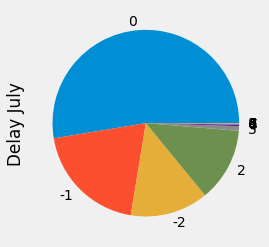

 0    15730
-1     6046
 2     3926
-2     3752
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Delay August, dtype: int64


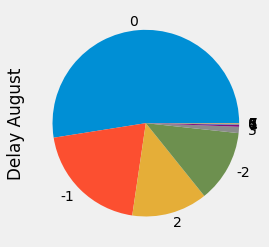

 0    14737
-1     5682
 1     3667
-2     2750
 2     2666
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Delay September, dtype: int64


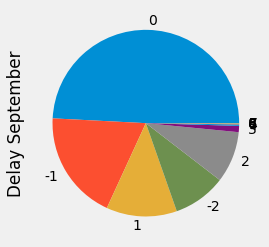

0    23335
1     6630
Name: Y: default payment next month, dtype: int64


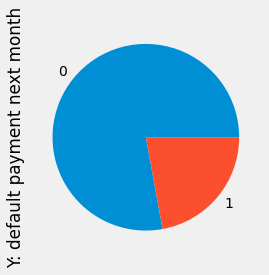

In [28]:
for feature in Bad_payers.select_dtypes('Int64'):
    plt.figure()
    print(Bad_payers[feature].value_counts())
    Bad_payers[feature].value_counts().plot.pie()
    plt.show()

# Distribution des variables numériques

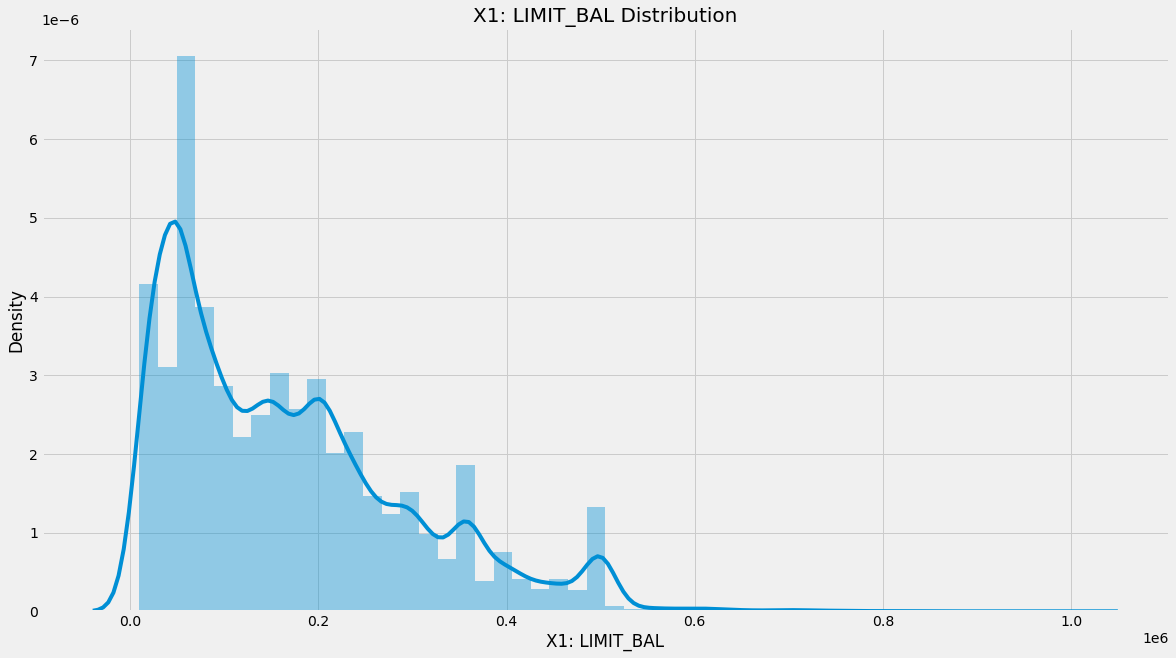

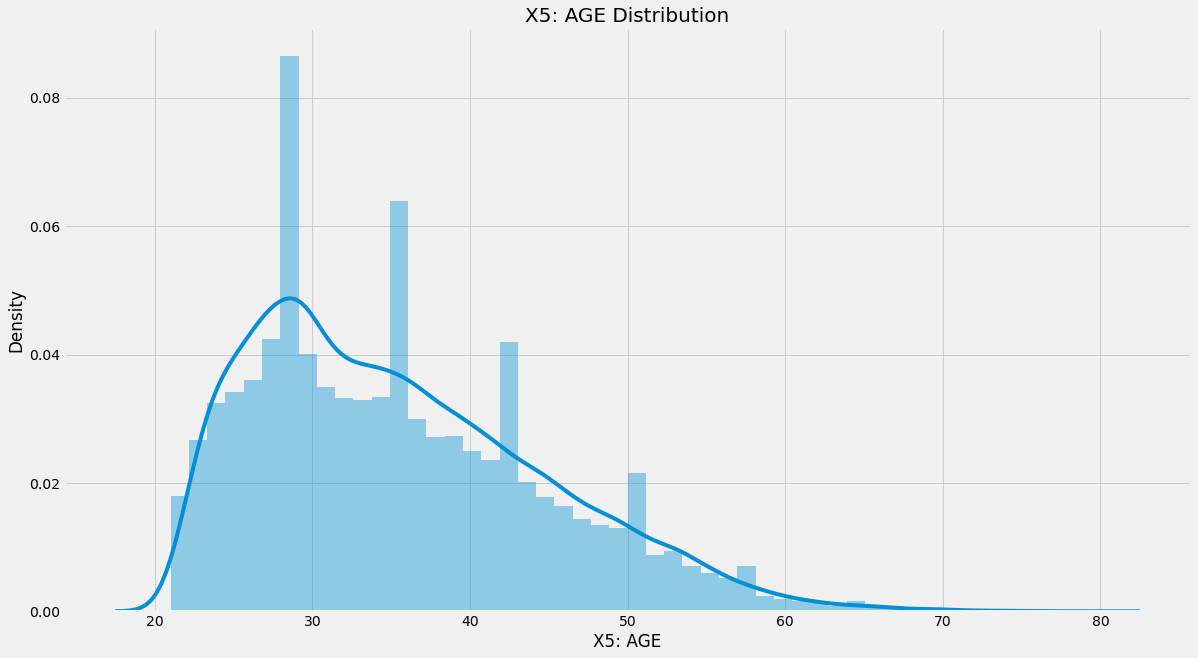

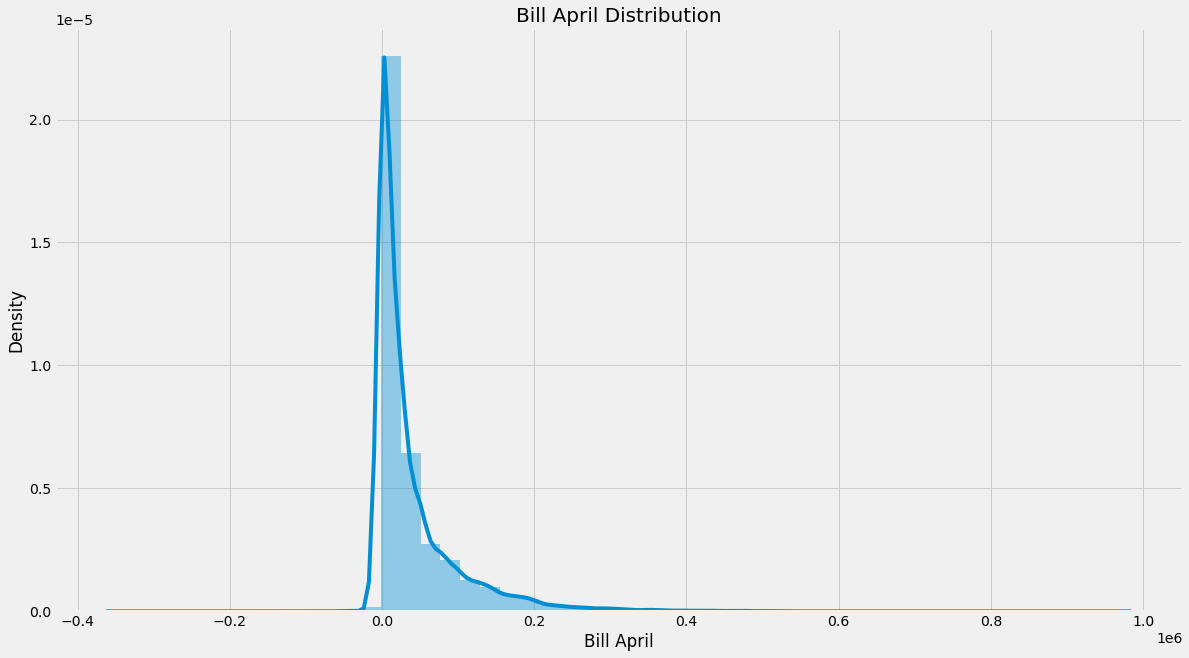

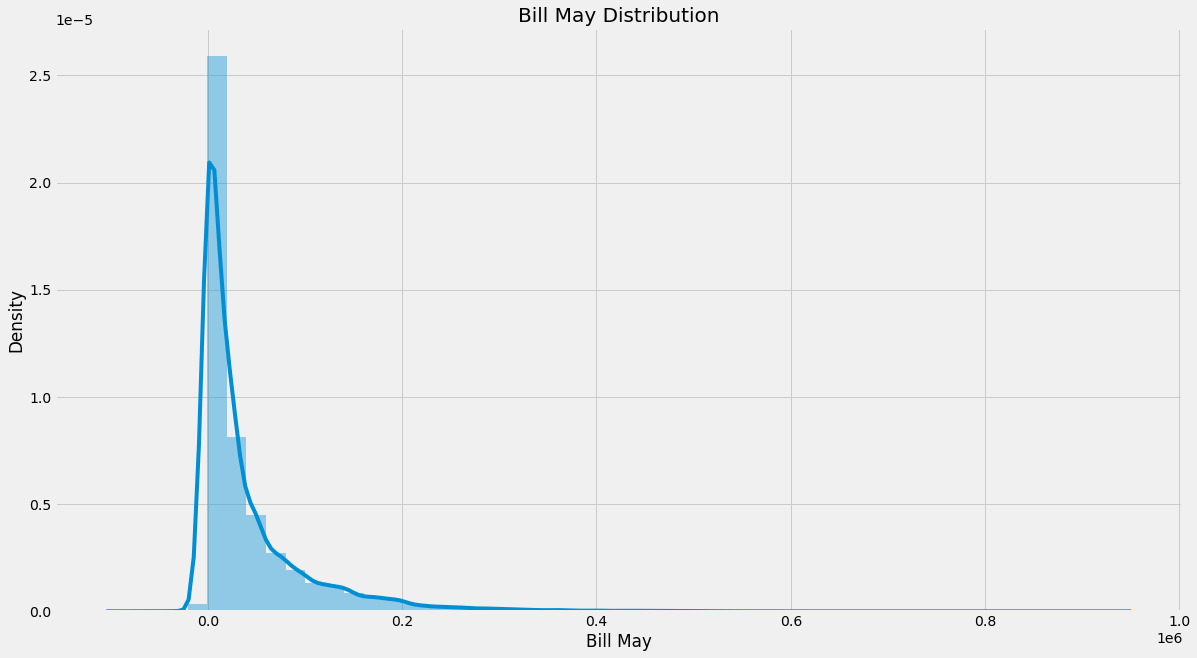

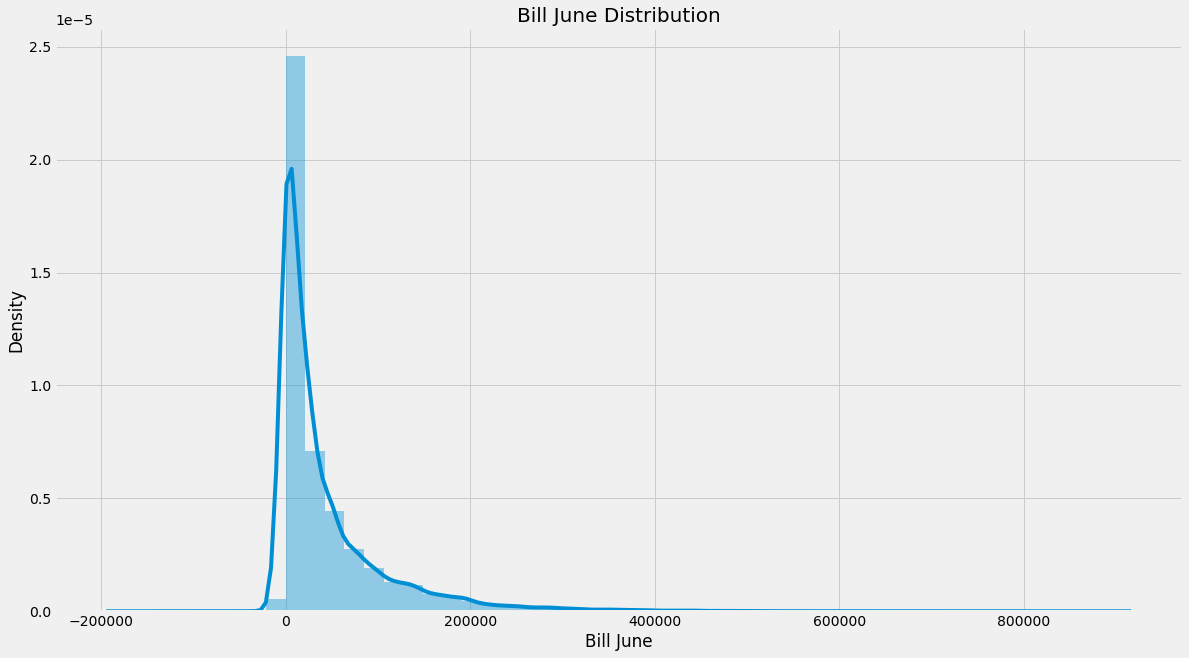

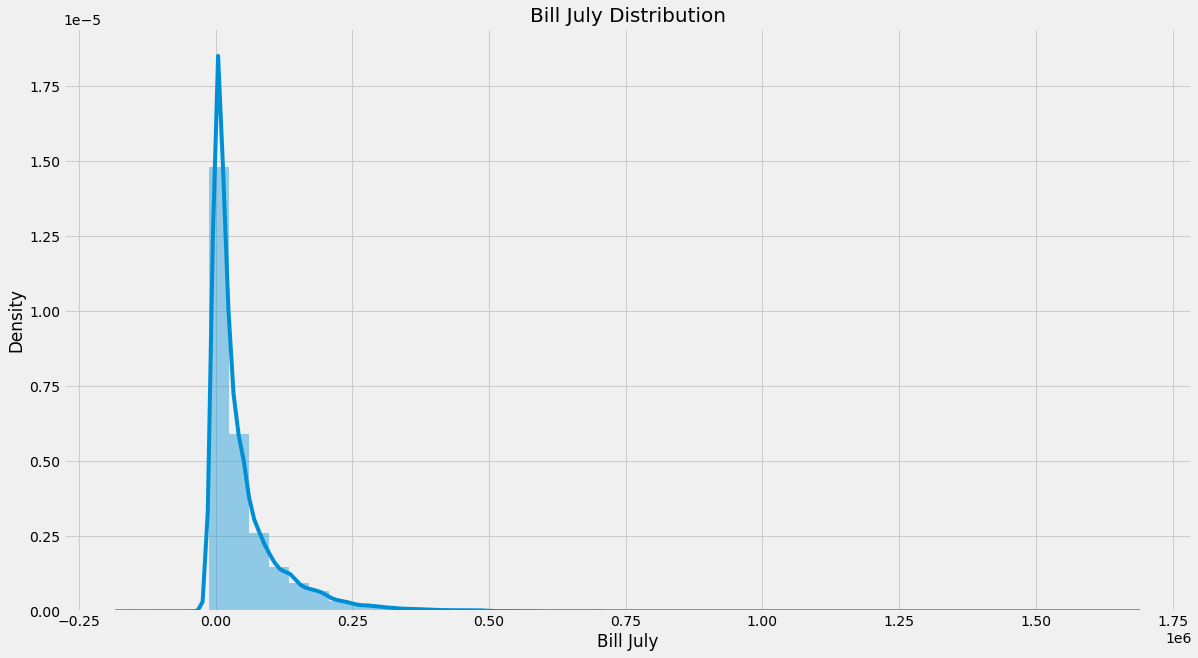

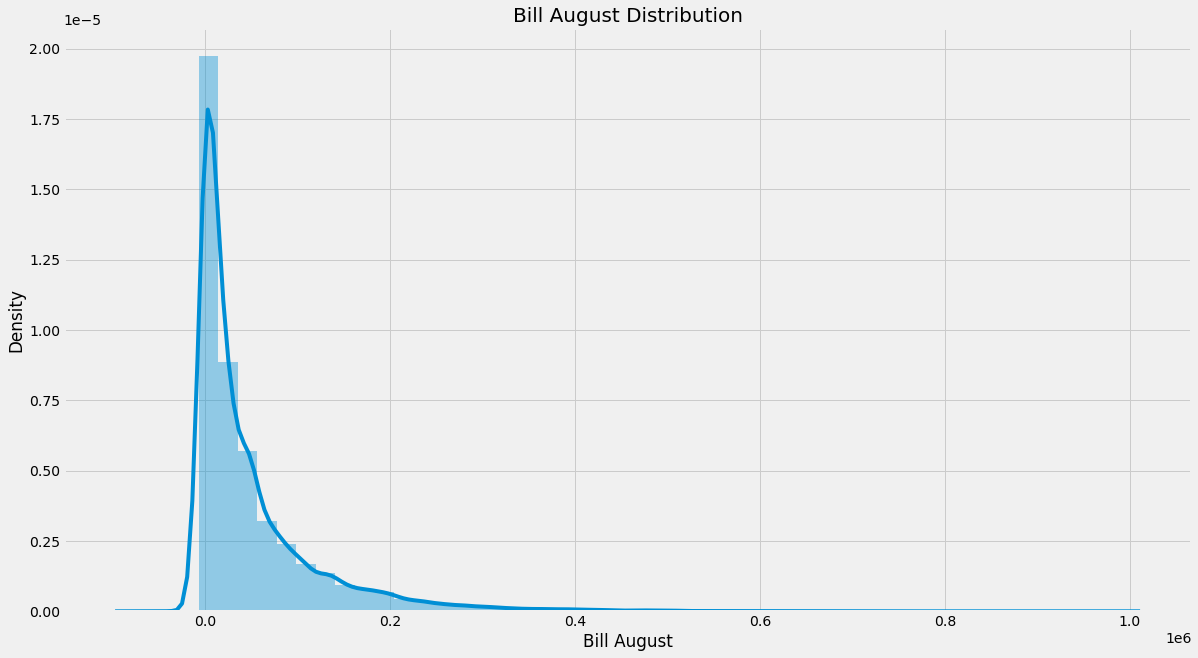

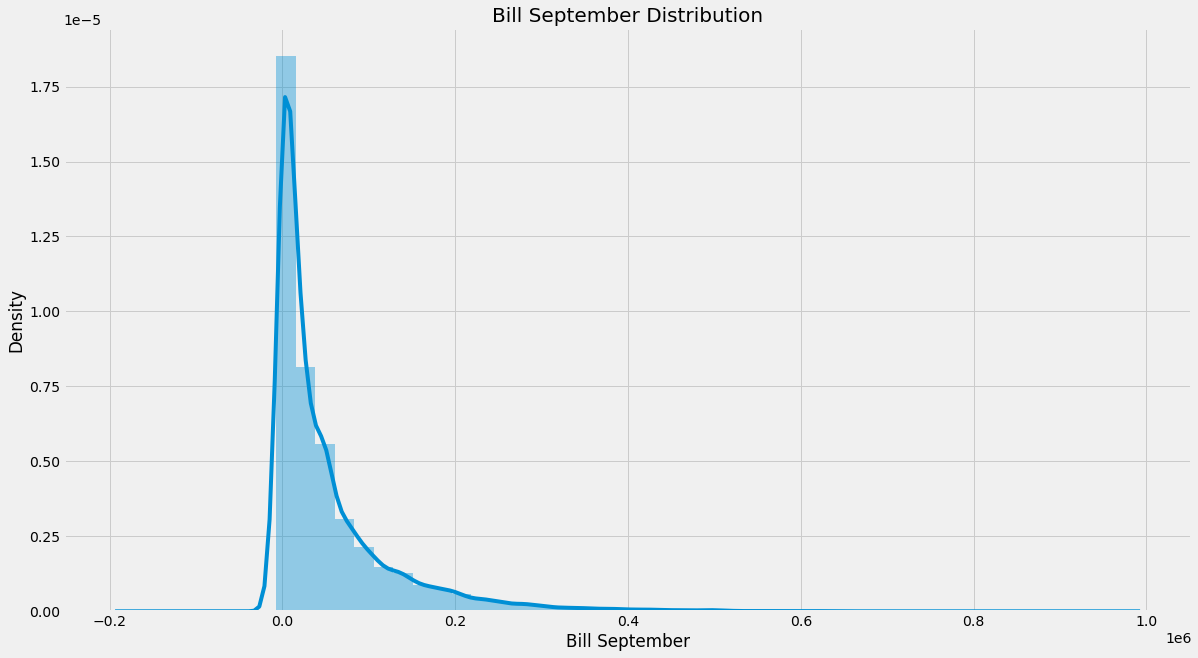

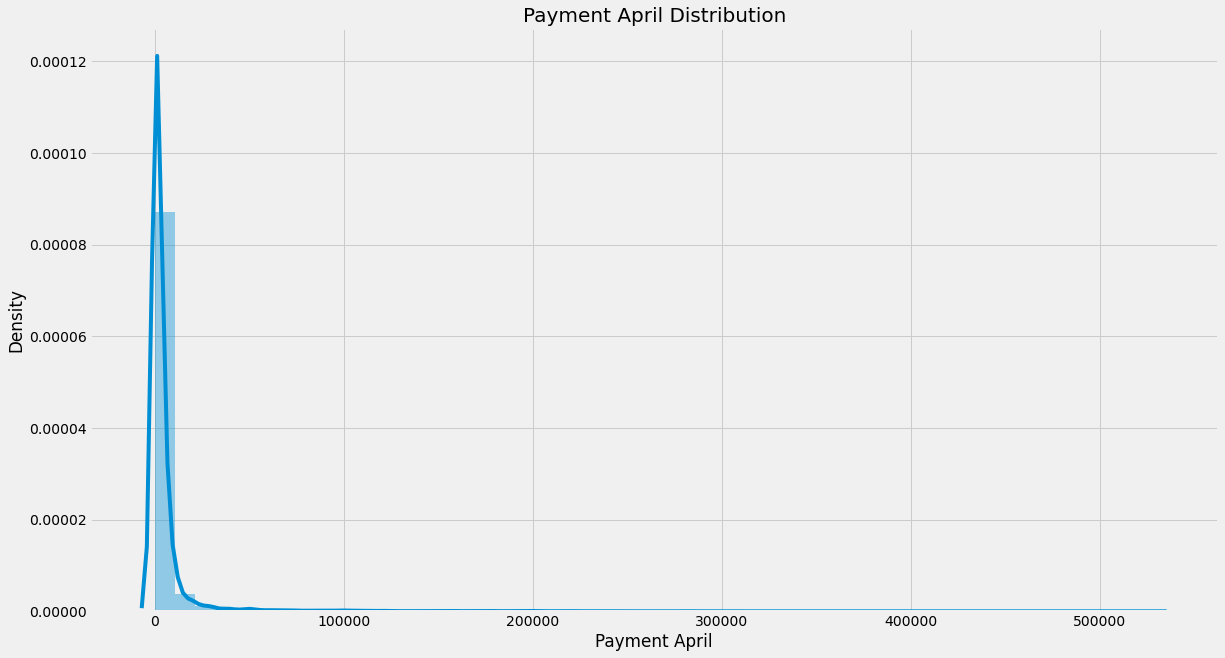

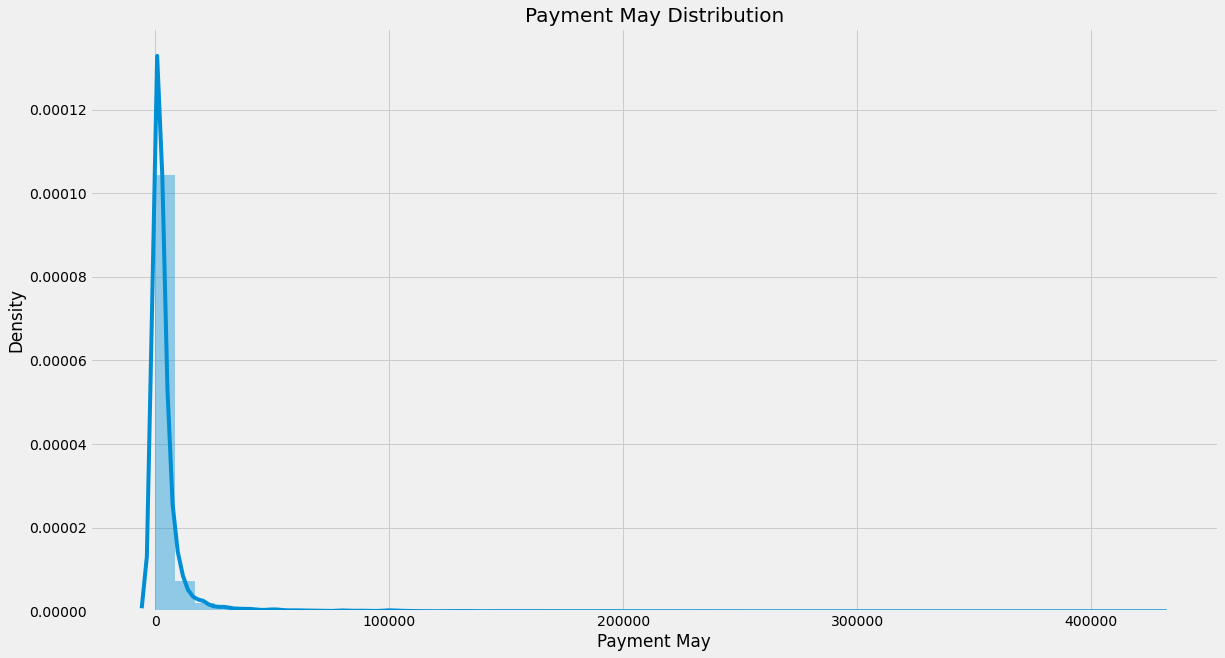

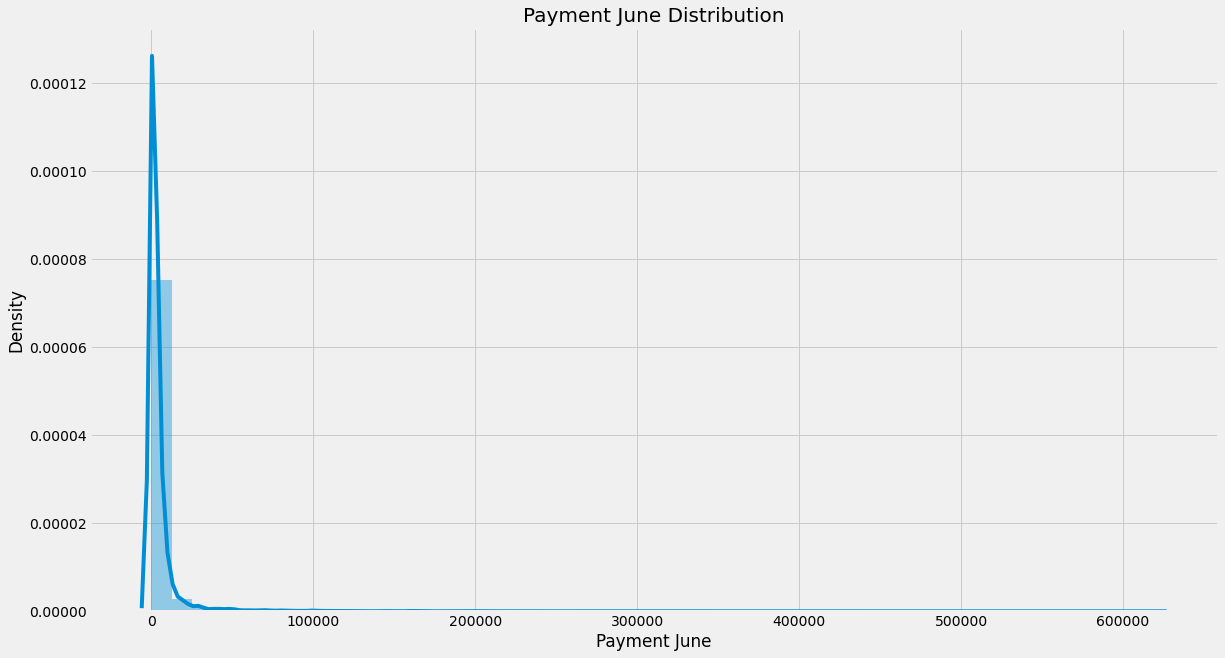

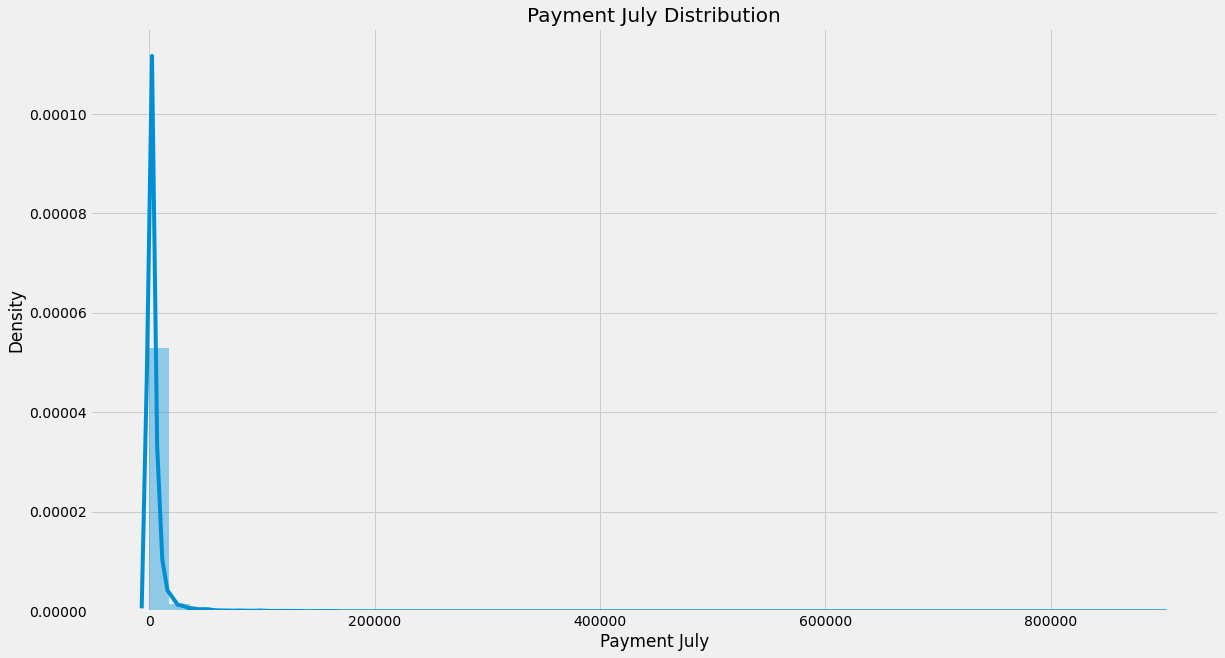

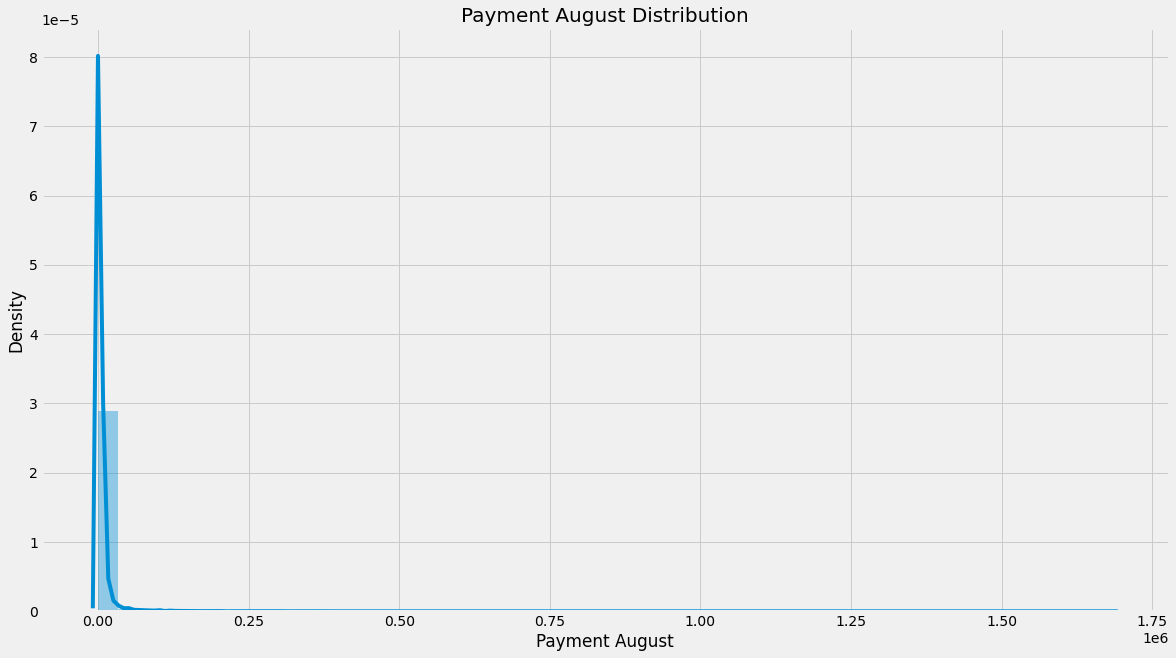

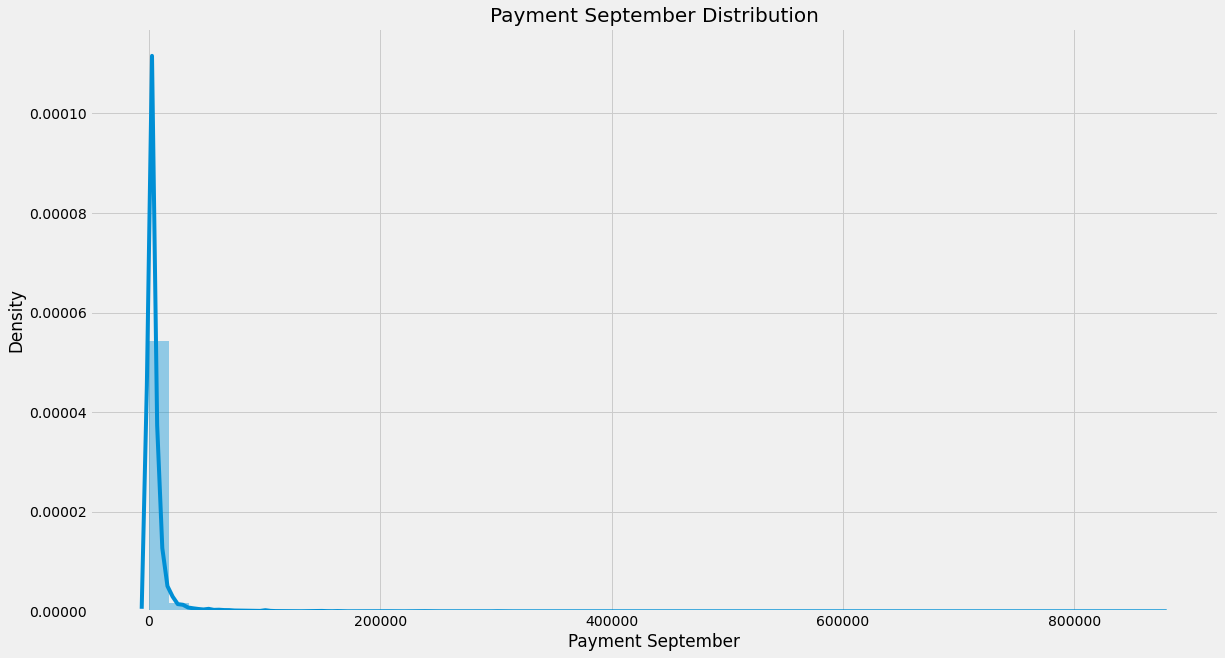

In [29]:
for feature in Bad_payers.select_dtypes('float64'):
    plt.figure(figsize=(18,10))
    sns.distplot(Bad_payers[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

# Corrélation

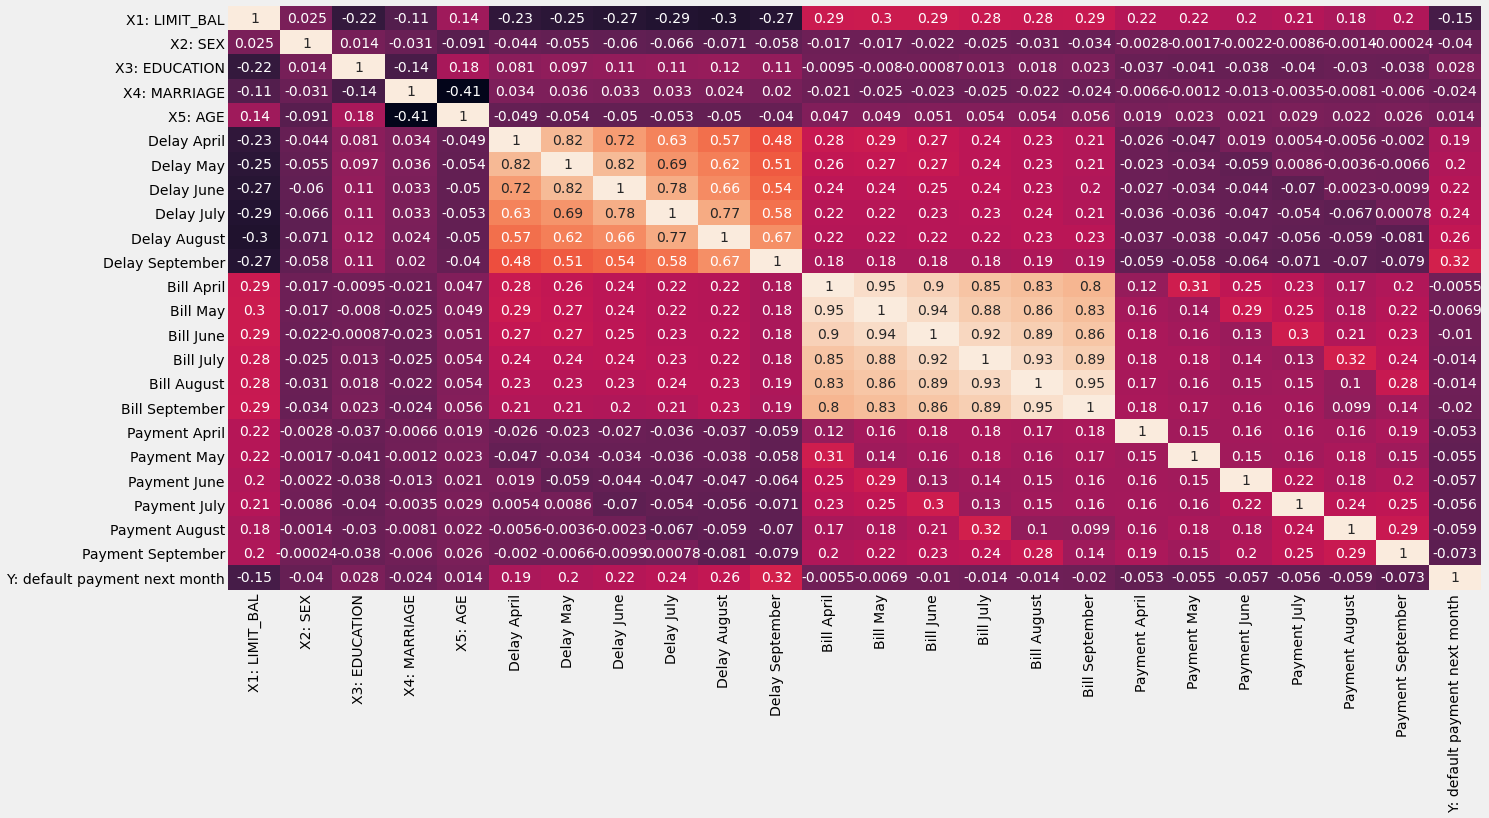

In [30]:
plt.figure(figsize=(20, 10))
sns.heatmap(Bad_payers.corr(), annot=True, cbar=False) #
plt.show()

In [31]:
prev = 0
total_pay = 0
total_bill = 0
total_delay = 0
max_delay = 0
for month in months:
    curr = Bad_payers["Bill " + month] - Bad_payers["Payment " + month] + prev
    #Bad_payers["Total " + month] = curr
    prev = curr
    total_pay += Bad_payers["Payment " + month]
    total_bill += Bad_payers["Bill " + month]
    total_delay += Bad_payers["Delay "+month]

Bad_payers["Total payment"] = total_pay
#Bad_payers["Total bill"] = total_bill
Bad_payers["Reste à payer"] = Bad_payers["X1: LIMIT_BAL"] - Bad_payers["Total payment"]
Bad_payers["Total delay"] = total_delay
    
Bad_payers.head(30)

,X1: LIMIT_BAL,X2: SEX,X3: EDUCATION,X4: MARRIAGE,X5: AGE,Delay April,Delay May,Delay June,Delay July,Delay August,Delay September,Bill April,Bill May,Bill June,Bill July,Bill August,Bill September,Payment April,Payment May,Payment June,Payment July,Payment August,Payment September,Y: default payment next month,Total payment,Reste à payer,Total delay
0,20000.0,2,2,1,24.0,-2,-2,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1,689.0,19311.0,-2
1,120000.0,2,2,2,26.0,2,0,0,0,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1,5000.0,115000.0,3
2,90000.0,2,2,2,34.0,0,0,0,0,0,0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0,11018.0,78982.0,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,0,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0,8388.0,41612.0,0
4,50000.0,1,2,1,57.0,0,0,0,-1,0,-1,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0,59049.0,-9049.0,-2
5,50000.0,1,1,2,37.0,0,0,0,0,0,0,20024.0,19619.0,19394.0,57608.0,57069.0,64400.0,800.0,1000.0,1000.0,657.0,1815.0,2500.0,0,7772.0,42228.0,0
6,500000.0,1,1,2,29.0,0,0,0,0,0,0,473944.0,483003.0,542653.0,445007.0,412023.0,367965.0,13770.0,13750.0,20239.0,38000.0,40000.0,55000.0,0,180759.0,319241.0,0
7,100000.0,2,2,2,23.0,-1,0,0,-1,-1,0,567.0,-159.0,221.0,601.0,380.0,11876.0,1542.0,1687.0,581.0,0.0,601.0,380.0,0,4791.0,95209.0,-3
8,140000.0,2,3,1,28.0,0,0,0,2,0,0,3719.0,11793.0,12211.0,12108.0,14096.0,11285.0,1000.0,1000.0,1000.0,432.0,0.0,3329.0,0,6761.0,133239.0,2
9,20000.0,1,3,2,35.0,-1,-1,-2,-2,-2,-2,13912.0,13007.0,0.0,0.0,0.0,0.0,0.0,1122.0,13007.0,0.0,0.0,0.0,0,14129.0,5871.0,-10


In [32]:
max_delay = []
for index, row in Bad_payers.iterrows():
    max_delay.append(int(min(row['Delay April'], row['Delay May'], row['Delay June'], row['Delay July'], row['Delay August'], row['Delay September'])))

Bad_payers['Max delay'] = max_delay
Bad_payers.head(5)

,X1: LIMIT_BAL,X2: SEX,X3: EDUCATION,X4: MARRIAGE,X5: AGE,Delay April,Delay May,Delay June,Delay July,Delay August,Delay September,Bill April,Bill May,Bill June,Bill July,Bill August,Bill September,Payment April,Payment May,Payment June,Payment July,Payment August,Payment September,Y: default payment next month,Total payment,Reste à payer,Total delay,Max delay
0,20000.0,2,2,1,24.0,-2,-2,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1,689.0,19311.0,-2,-2
1,120000.0,2,2,2,26.0,2,0,0,0,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1,5000.0,115000.0,3,-1
2,90000.0,2,2,2,34.0,0,0,0,0,0,0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0,11018.0,78982.0,0,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,0,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0,8388.0,41612.0,0,0
4,50000.0,1,2,1,57.0,0,0,0,-1,0,-1,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0,59049.0,-9049.0,-2,-1


In [33]:
no_corel = ['X2: SEX', 'X3: EDUCATION', 'X4: MARRIAGE', 'X5: AGE', 'Bill April', 'Bill May', 'Bill June', 'Bill July', 'Bill August', 'Bill September']
for i in no_corel:
    del Bad_payers[i]

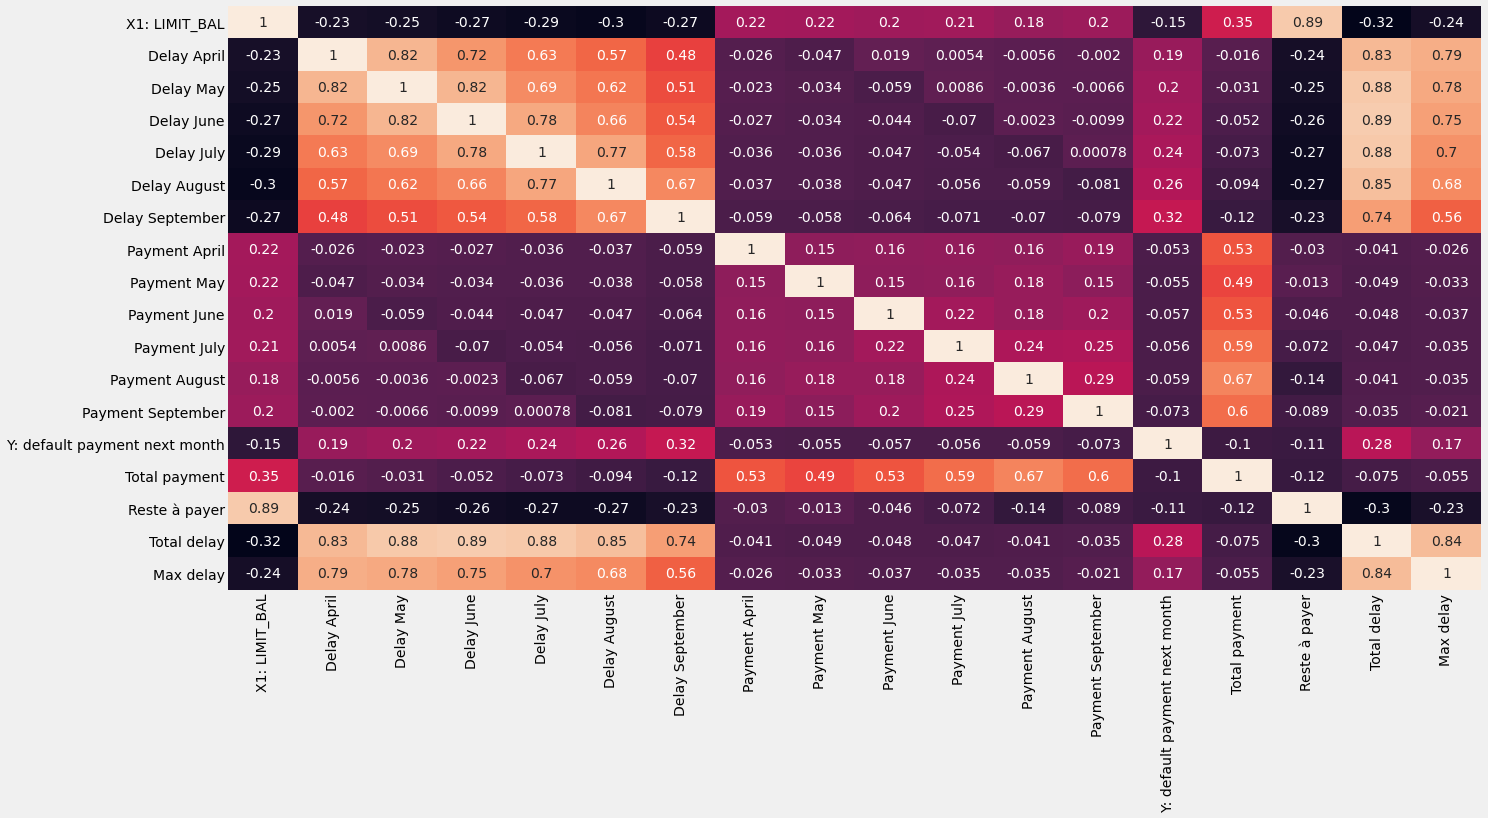

In [34]:
plt.figure(figsize=(20, 10))
sns.heatmap(Bad_payers.corr(), annot=True, cbar=False) #
plt.show()

# Analyse bivariée

In [35]:
target = "Y: default payment next month"

#plt.figure(figsize=(32,16))
#sns.boxplot(x="Bill April", data=Bad_payers, hue=target)
#plt.title("Bill April")
#plt.show()

In [36]:
cat_features = Bad_payers.select_dtypes(include=['int64']).columns
cont_features = Bad_payers.drop(target, axis=1).columns
print(cat_features, "\n", cont_features)

Index(['Delay April', 'Delay May', 'Delay June', 'Delay July', 'Delay August',
       'Delay September', 'Y: default payment next month', 'Total delay',
       'Max delay'],
      dtype='object') 
 Index(['X1: LIMIT_BAL', 'Delay April', 'Delay May', 'Delay June', 'Delay July',
       'Delay August', 'Delay September', 'Payment April', 'Payment May',
       'Payment June', 'Payment July', 'Payment August', 'Payment September',
       'Total payment', 'Reste à payer', 'Total delay', 'Max delay'],
      dtype='object')


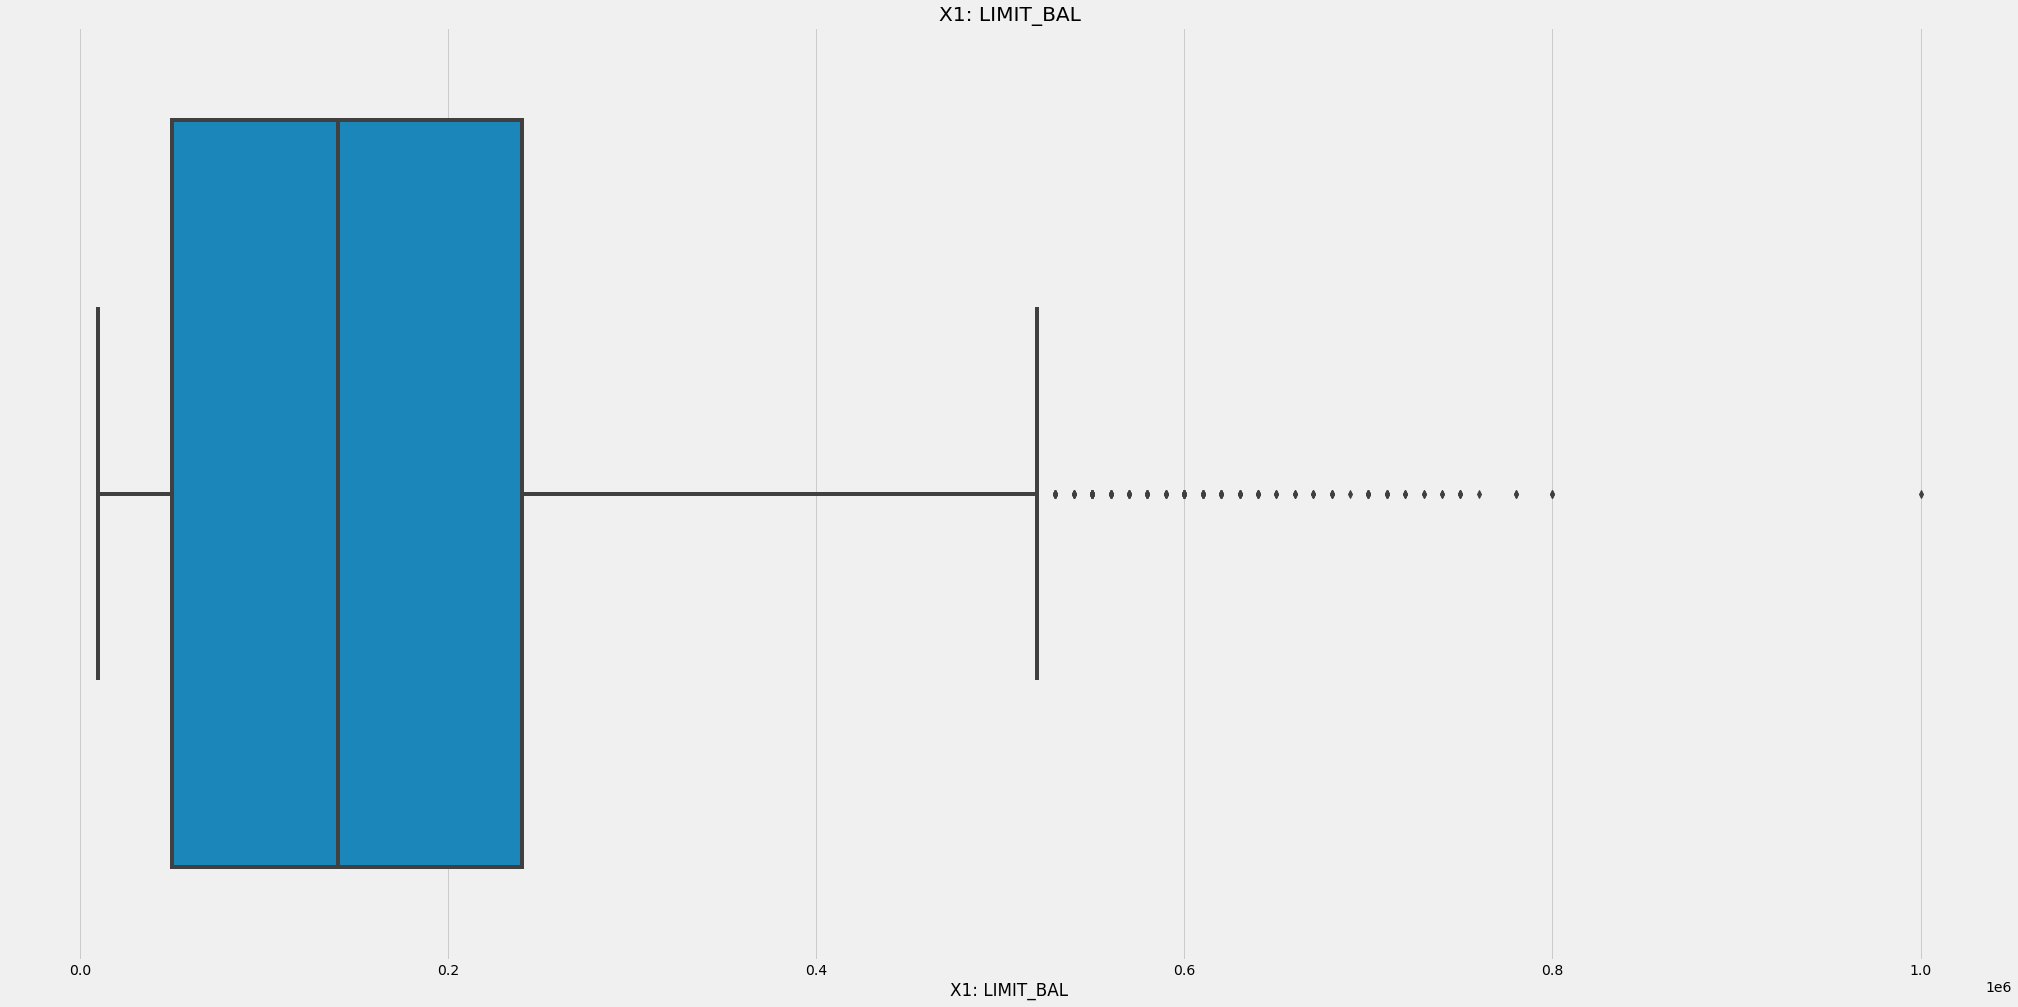

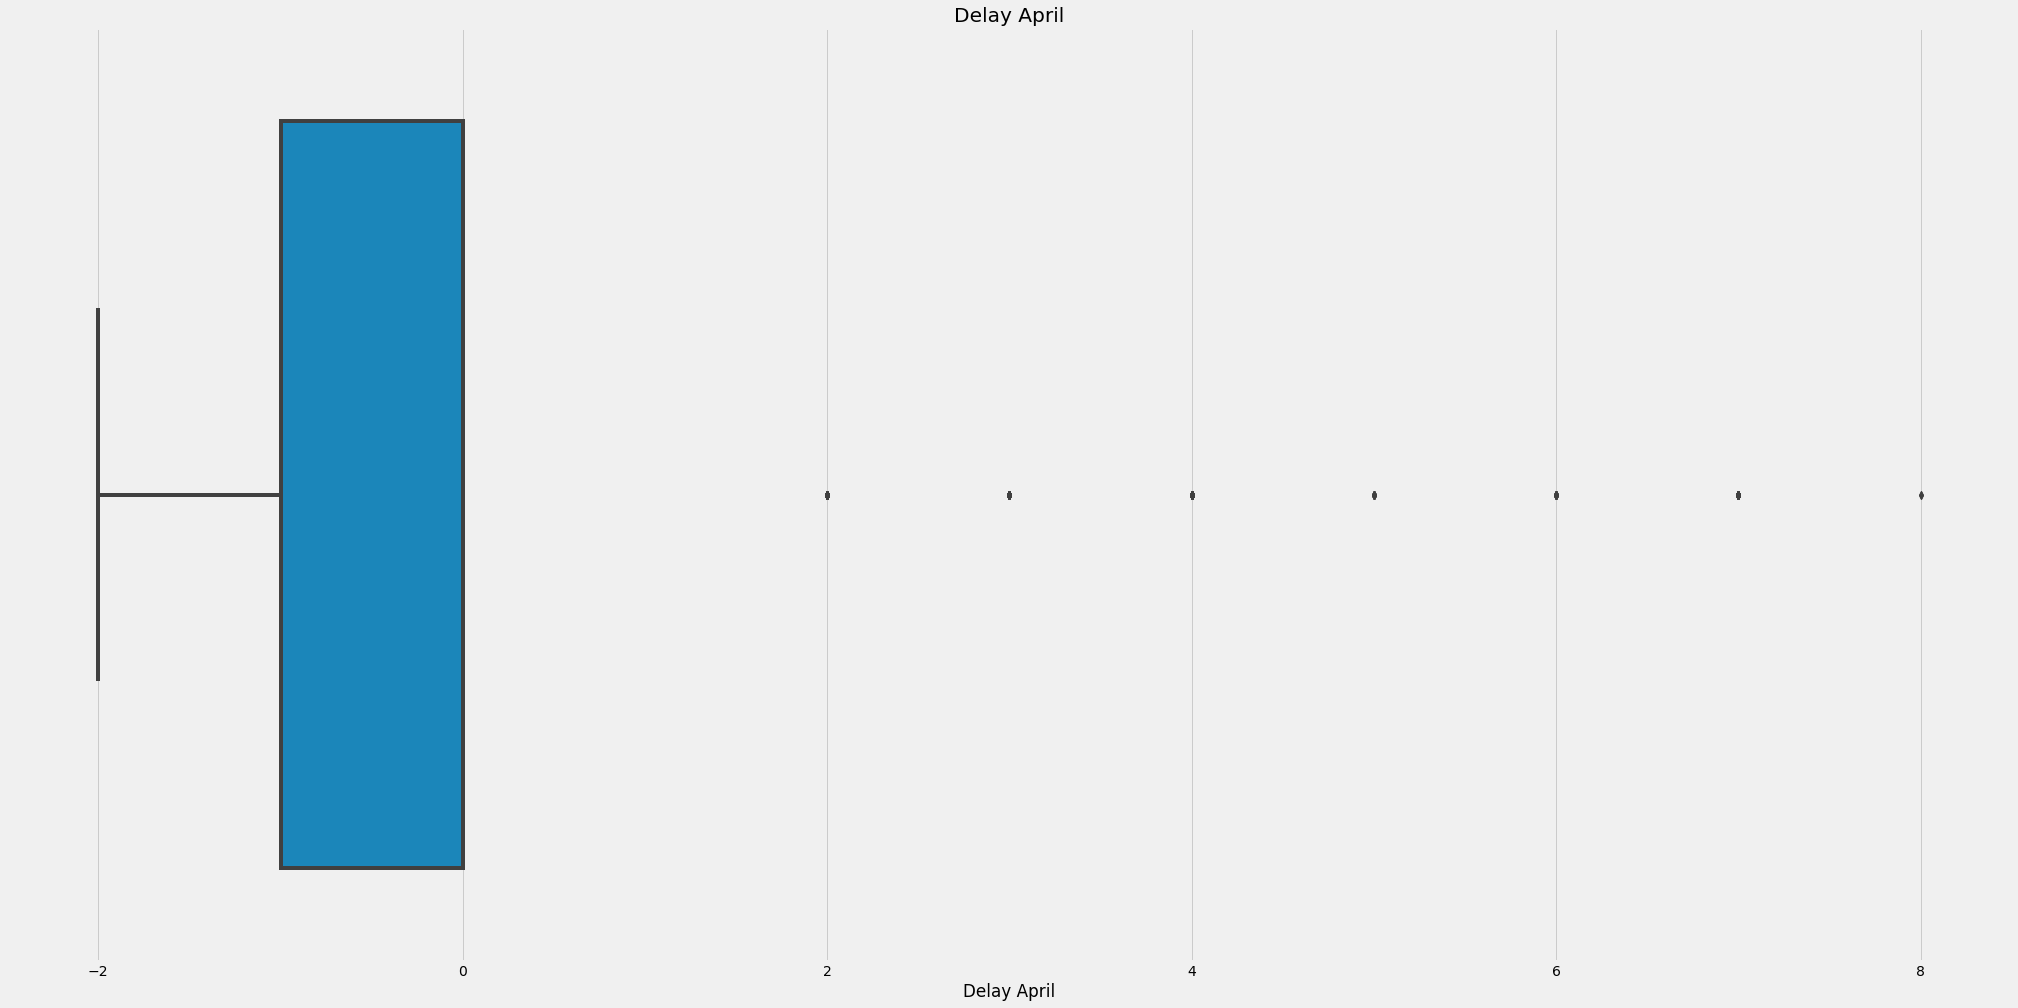

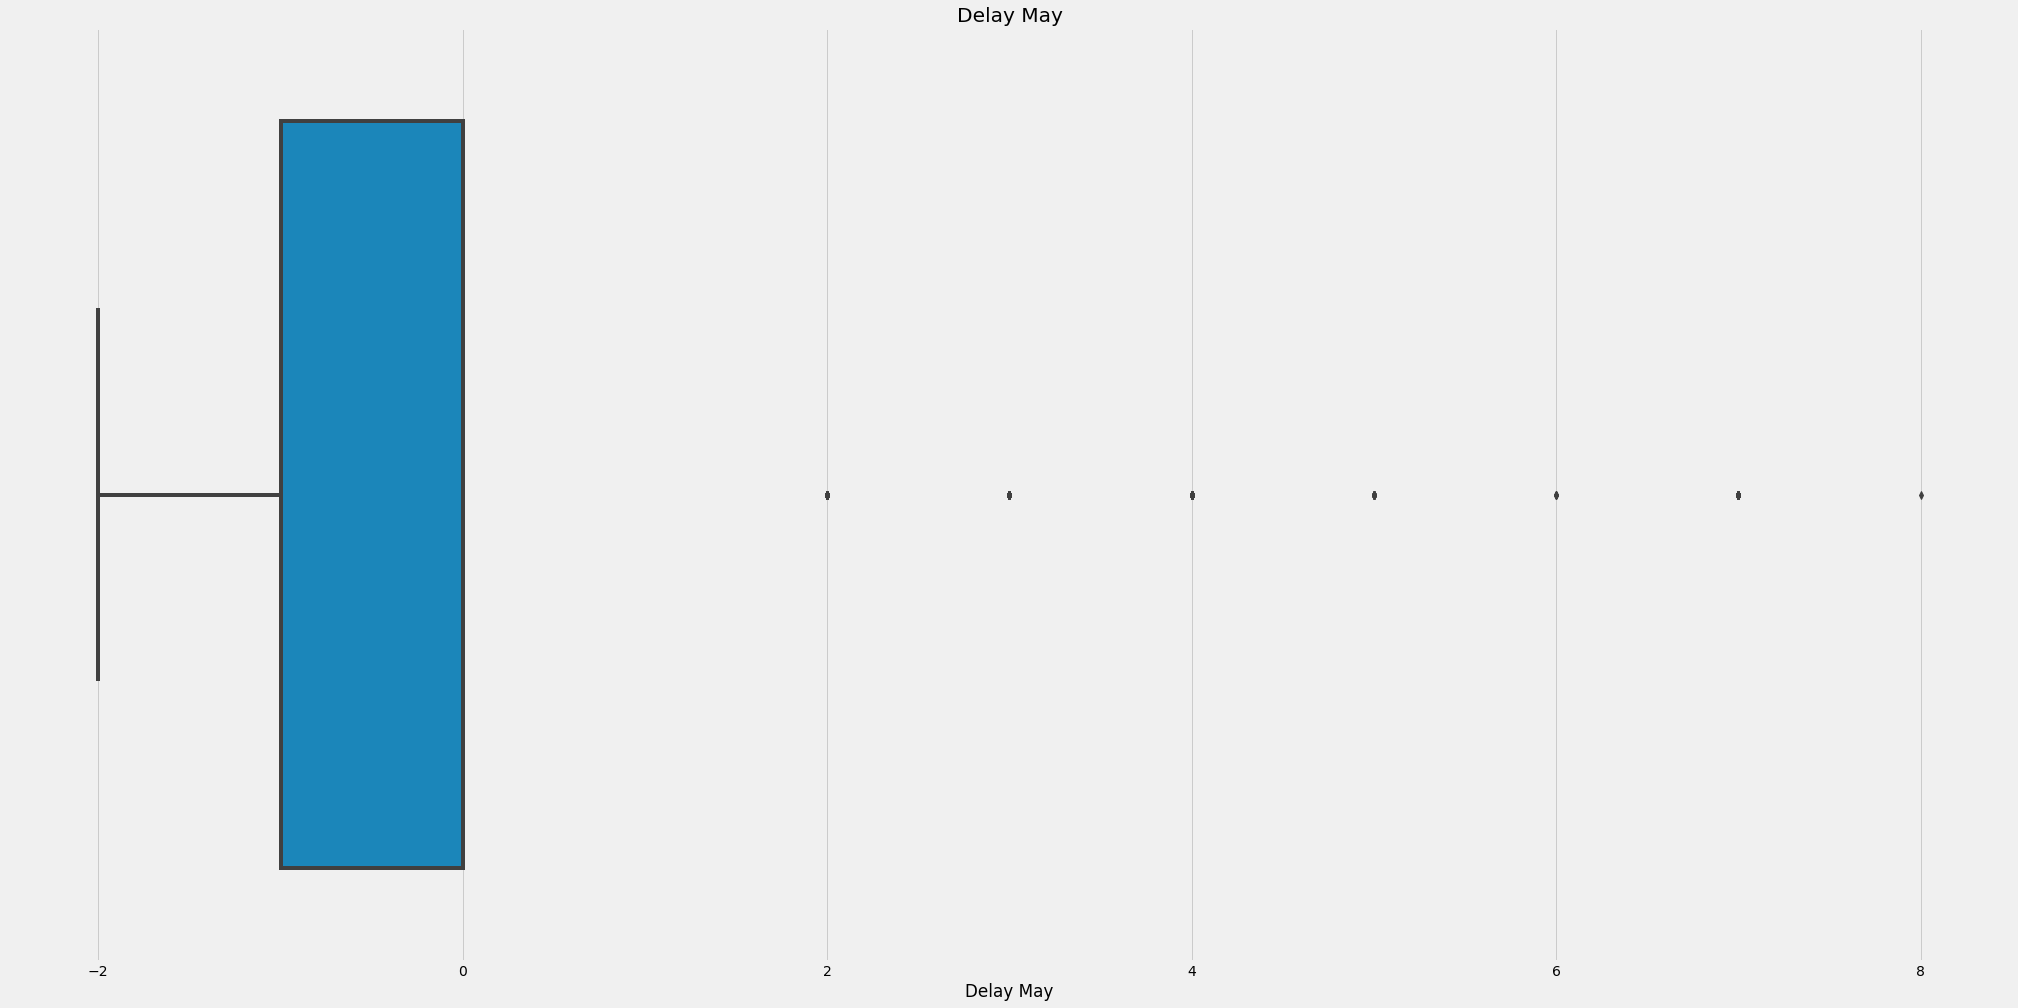

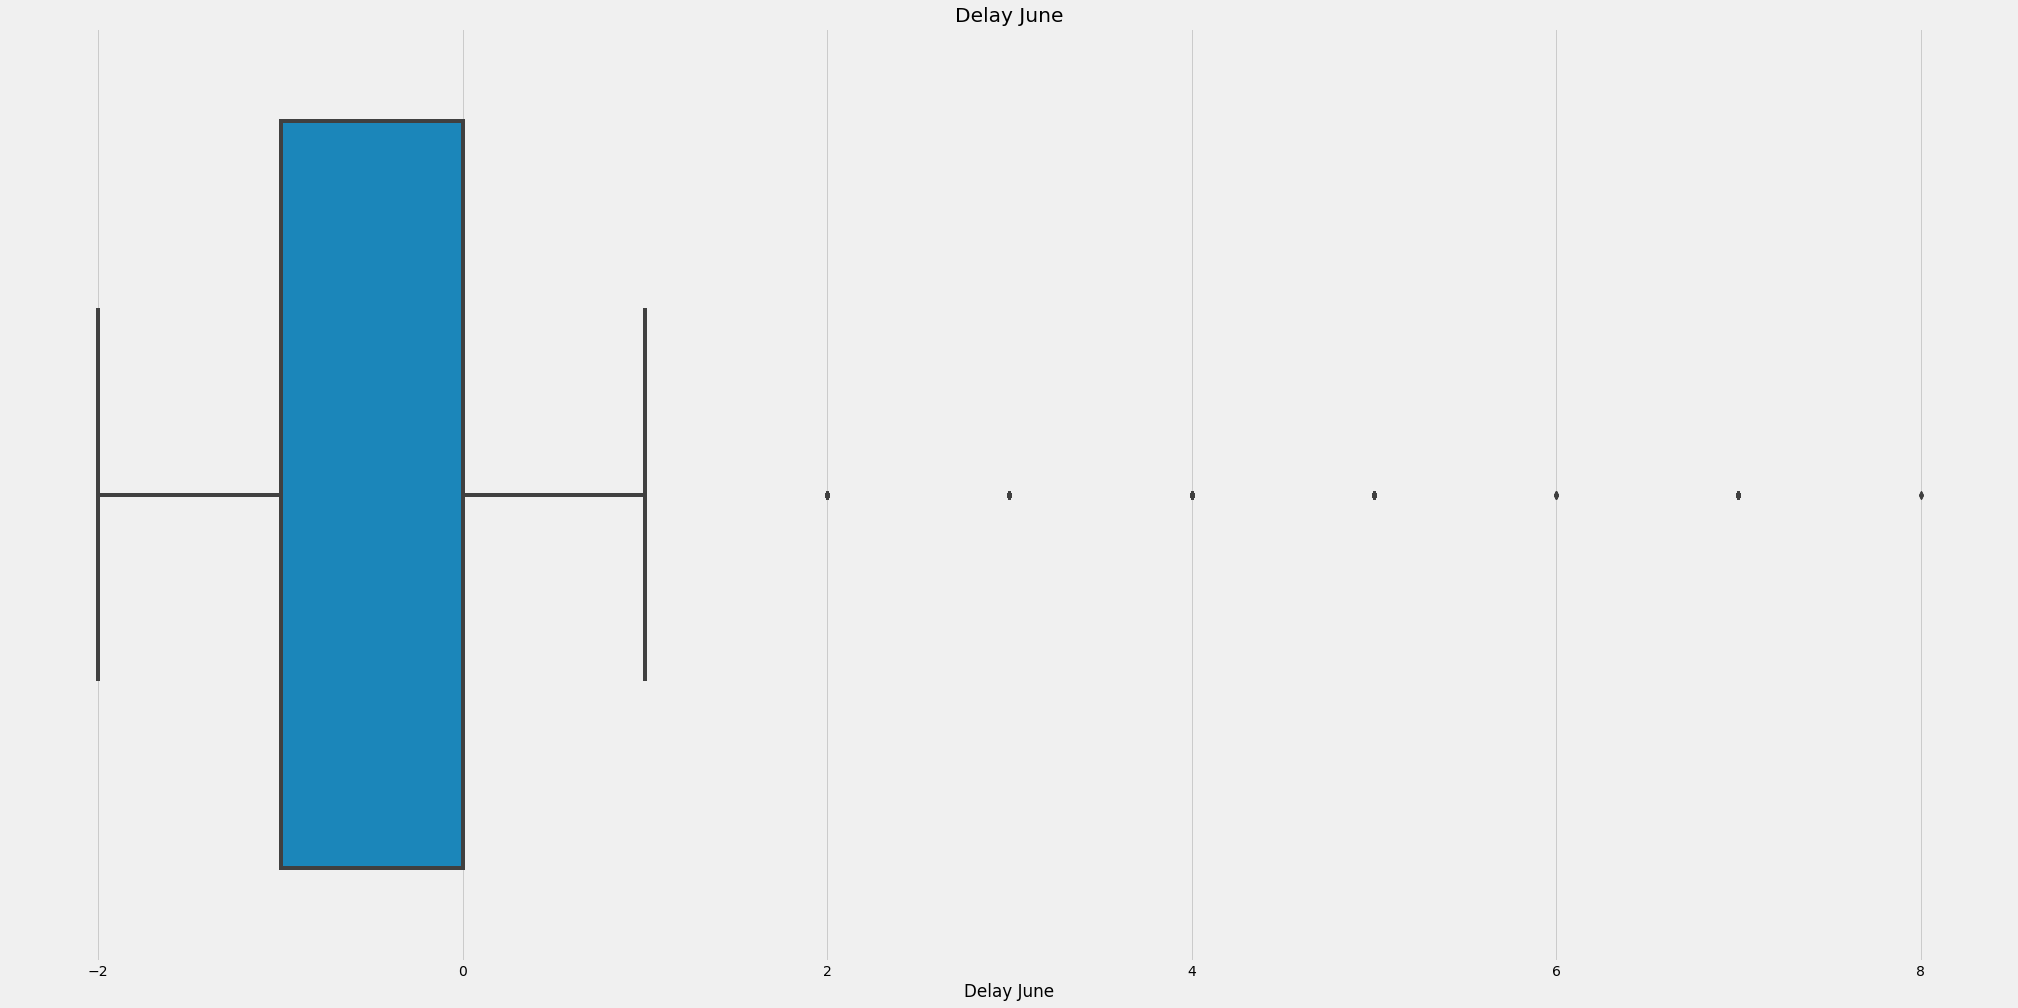

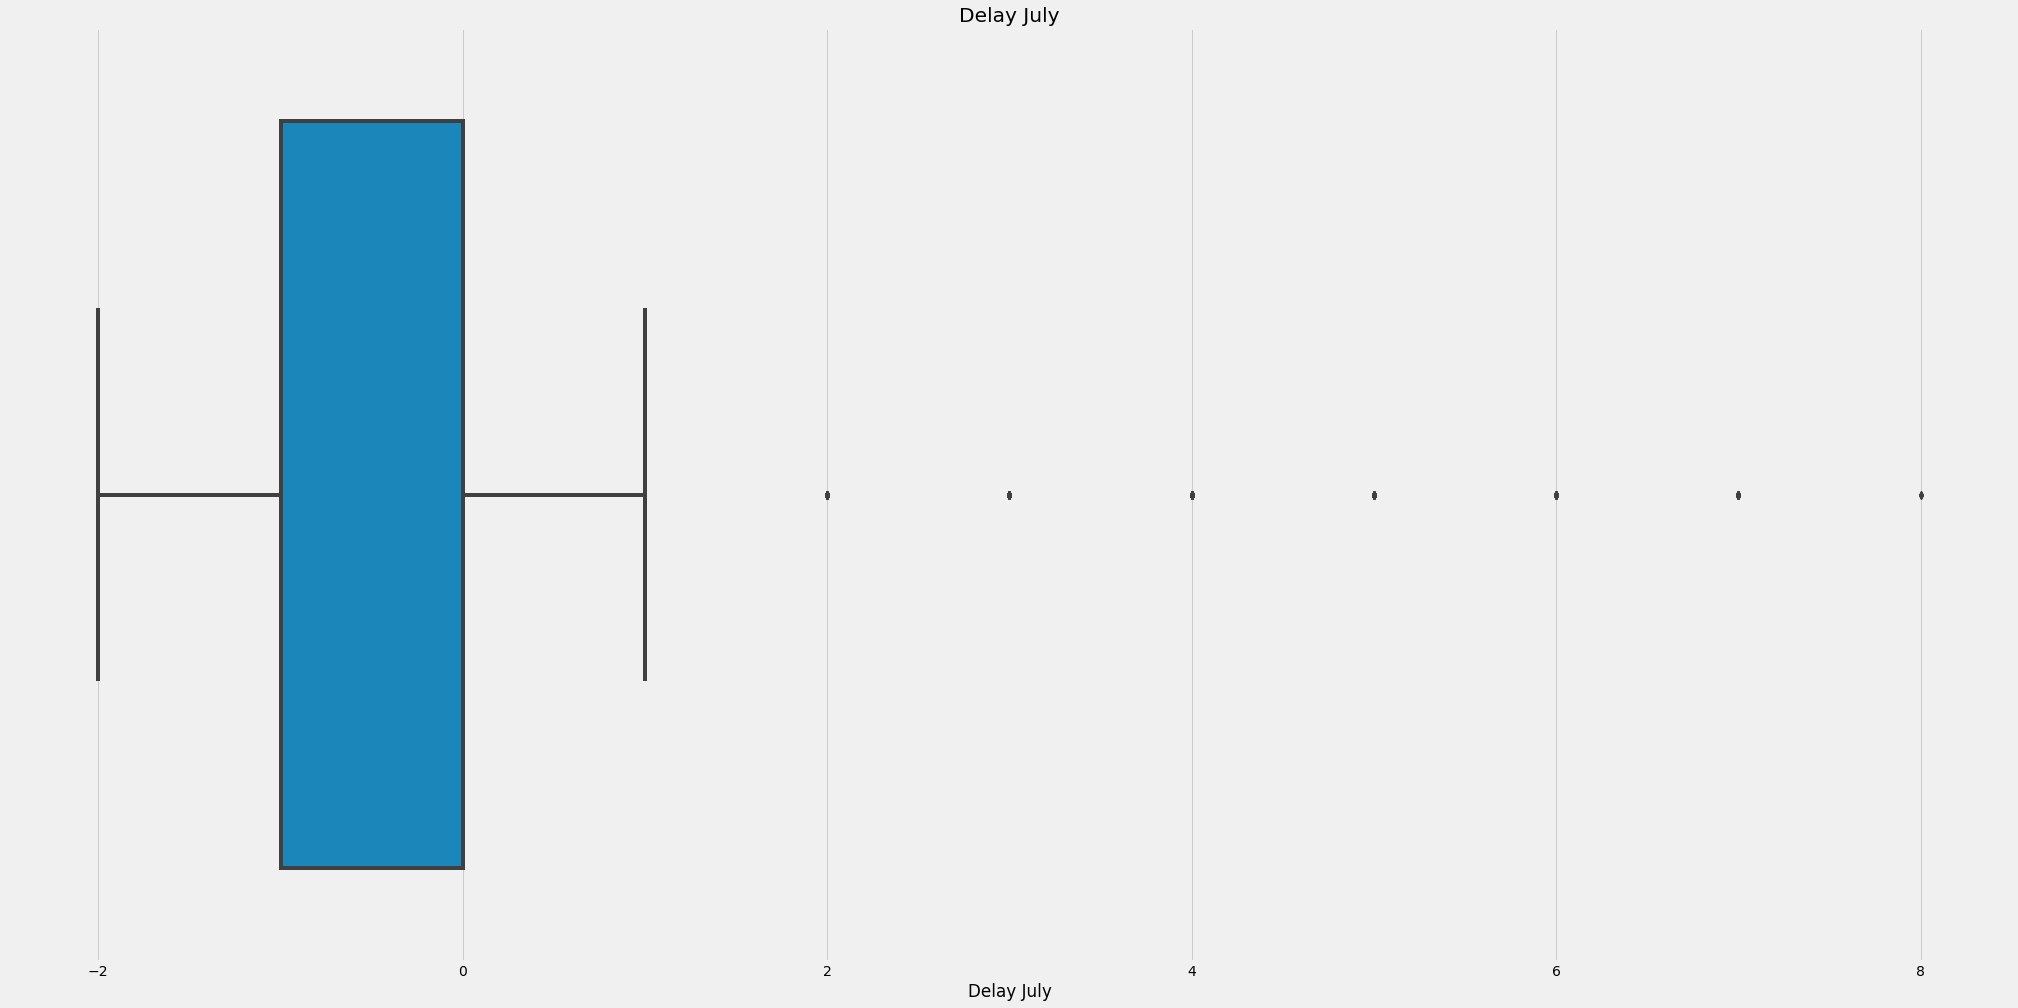

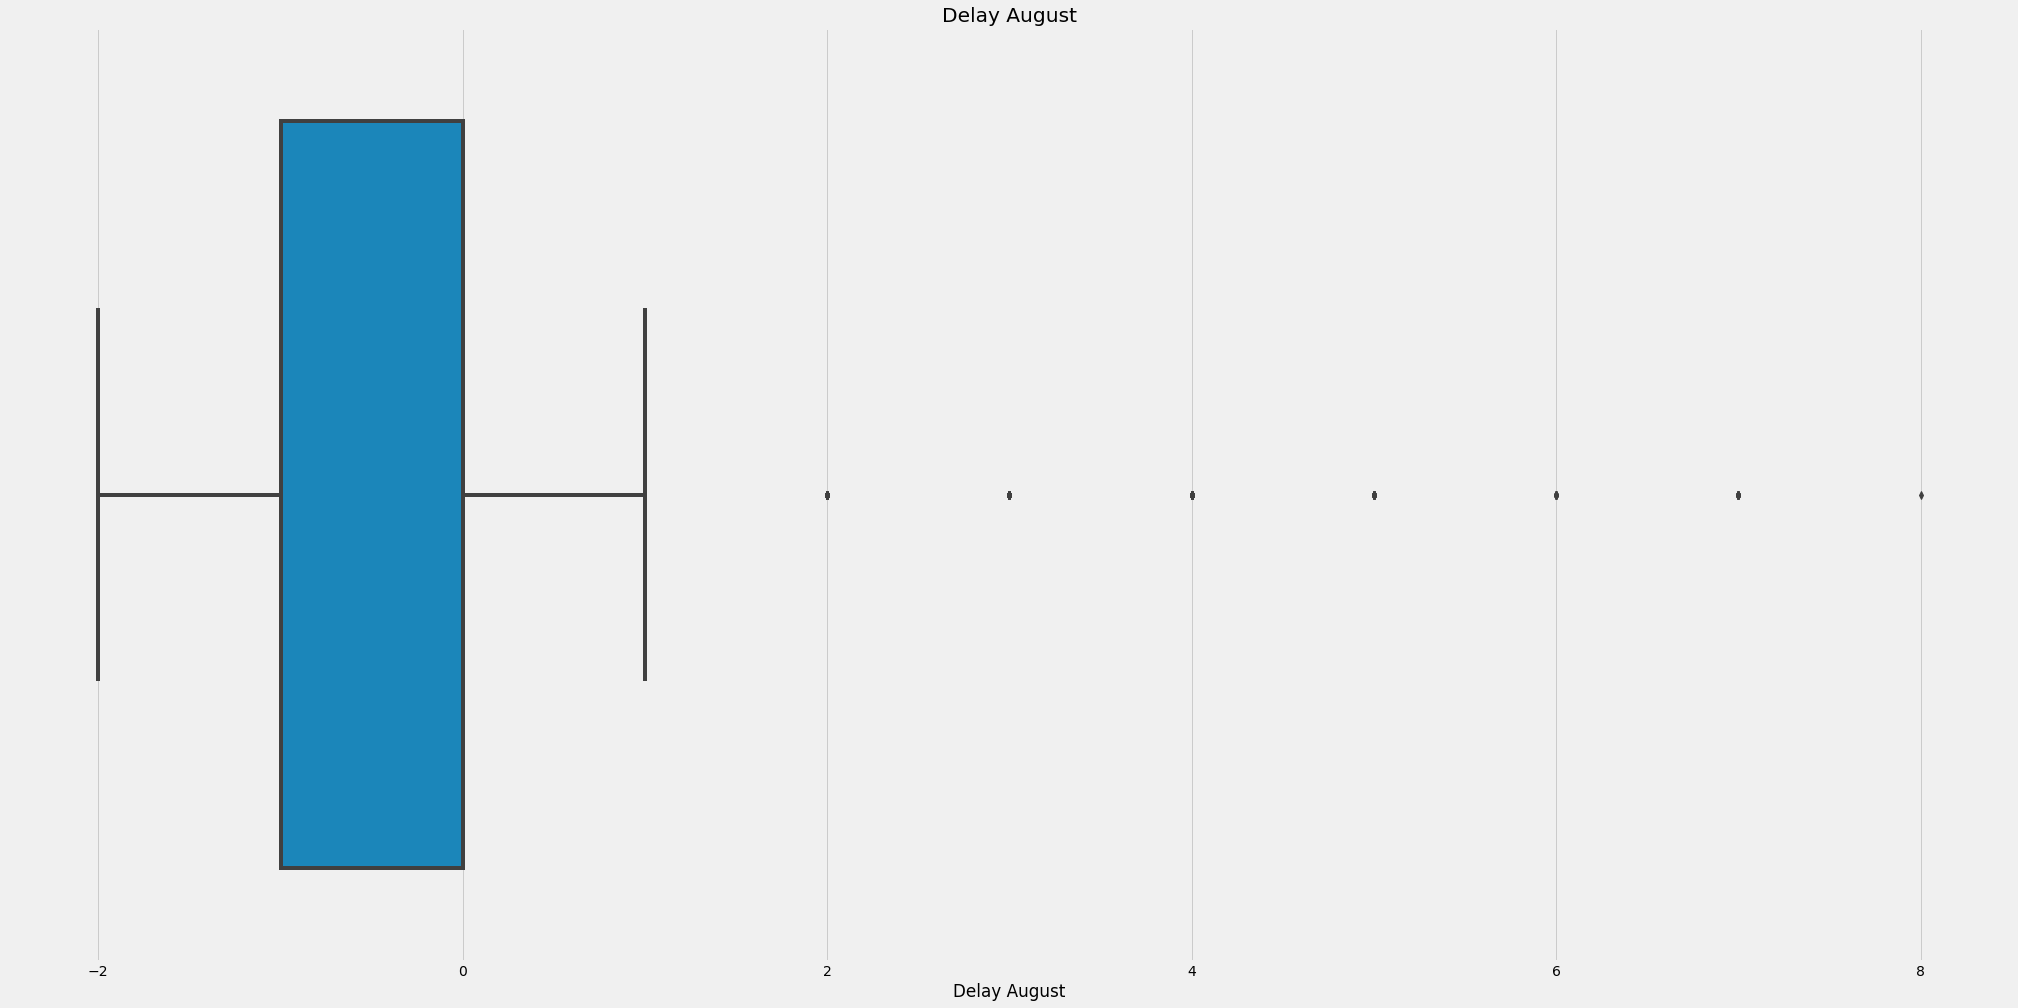

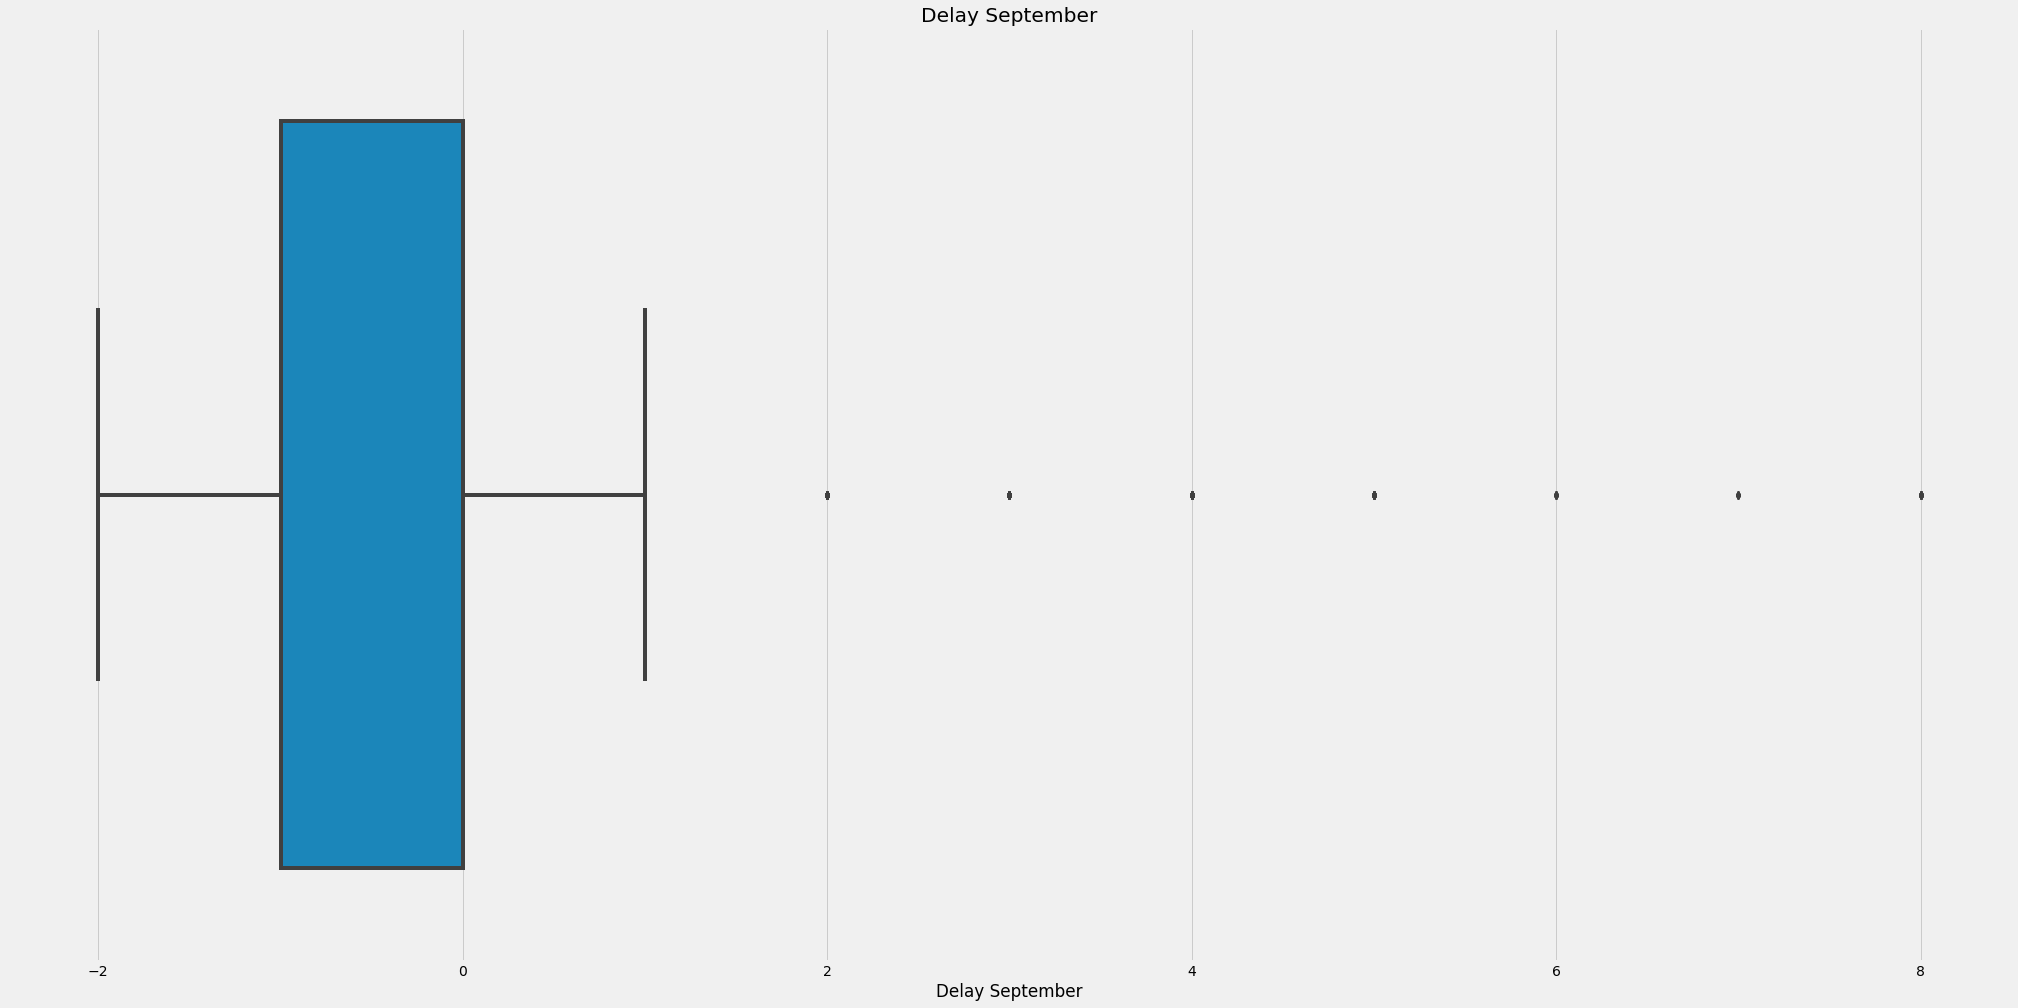

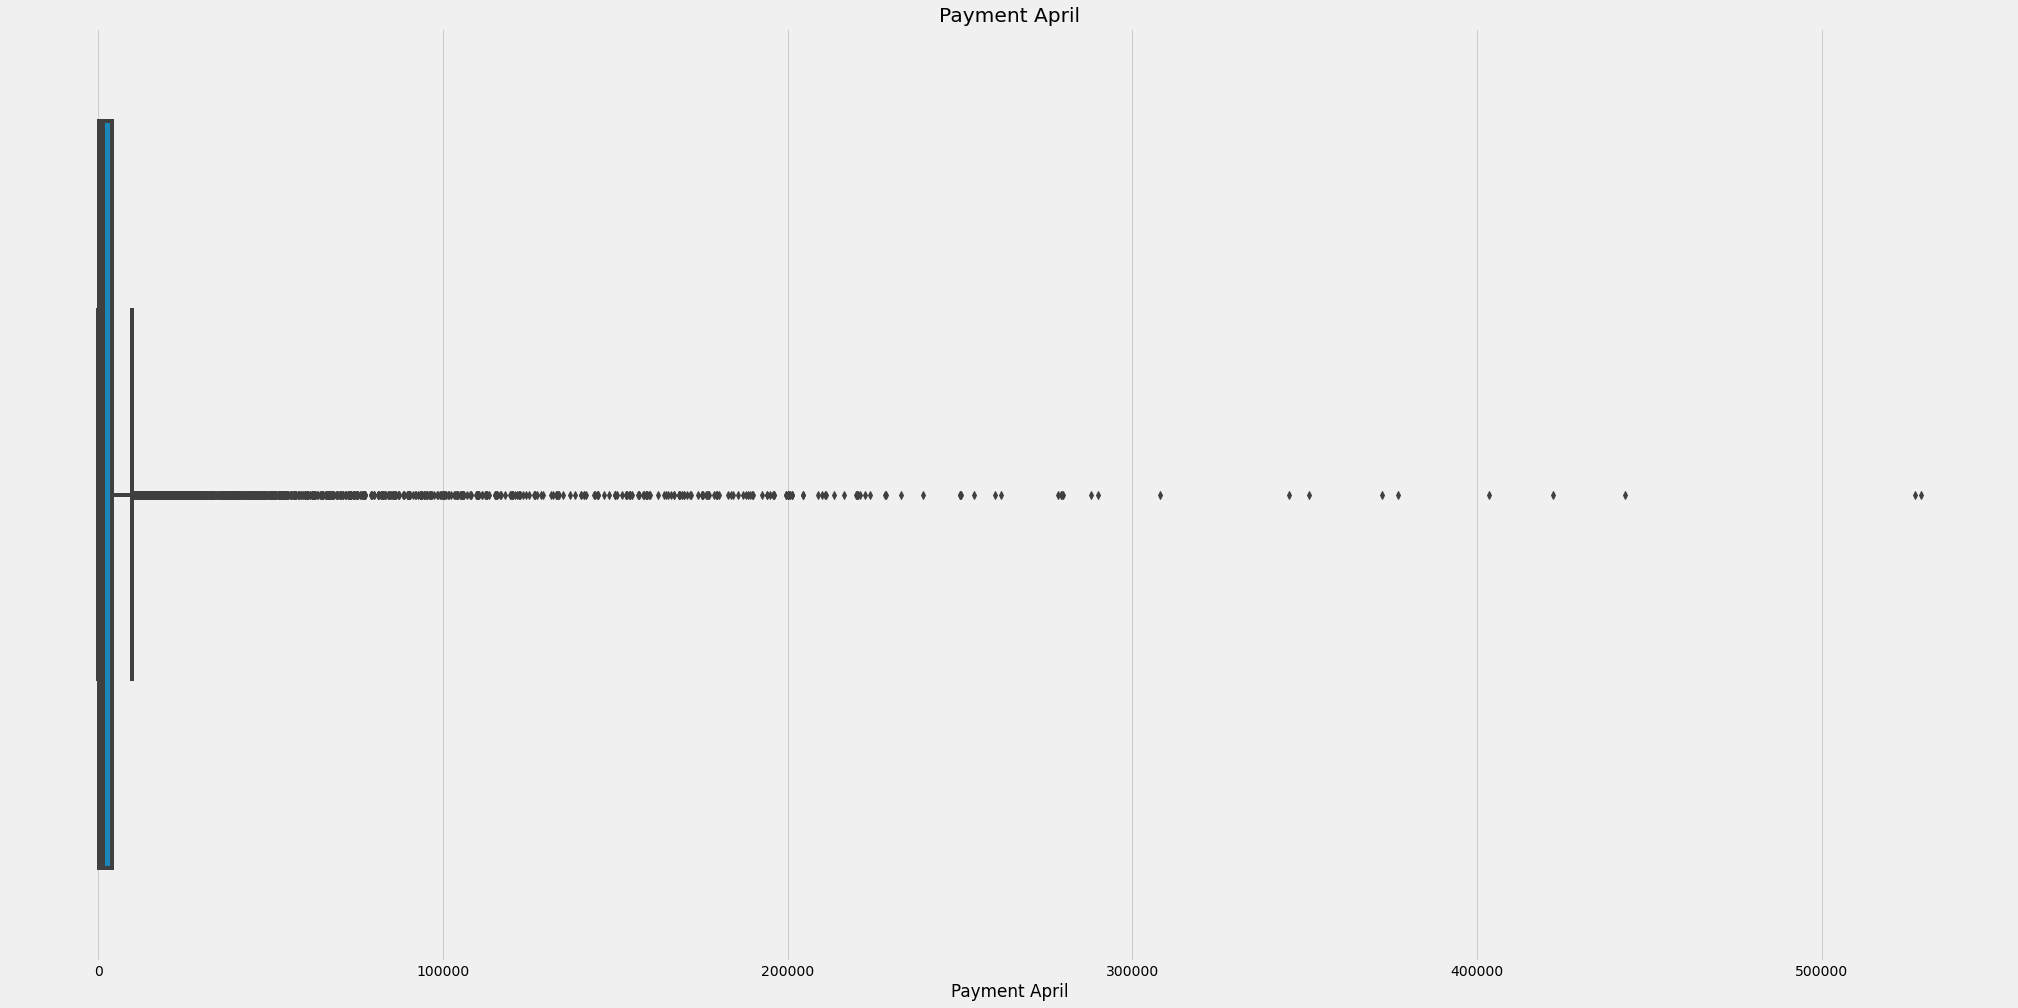

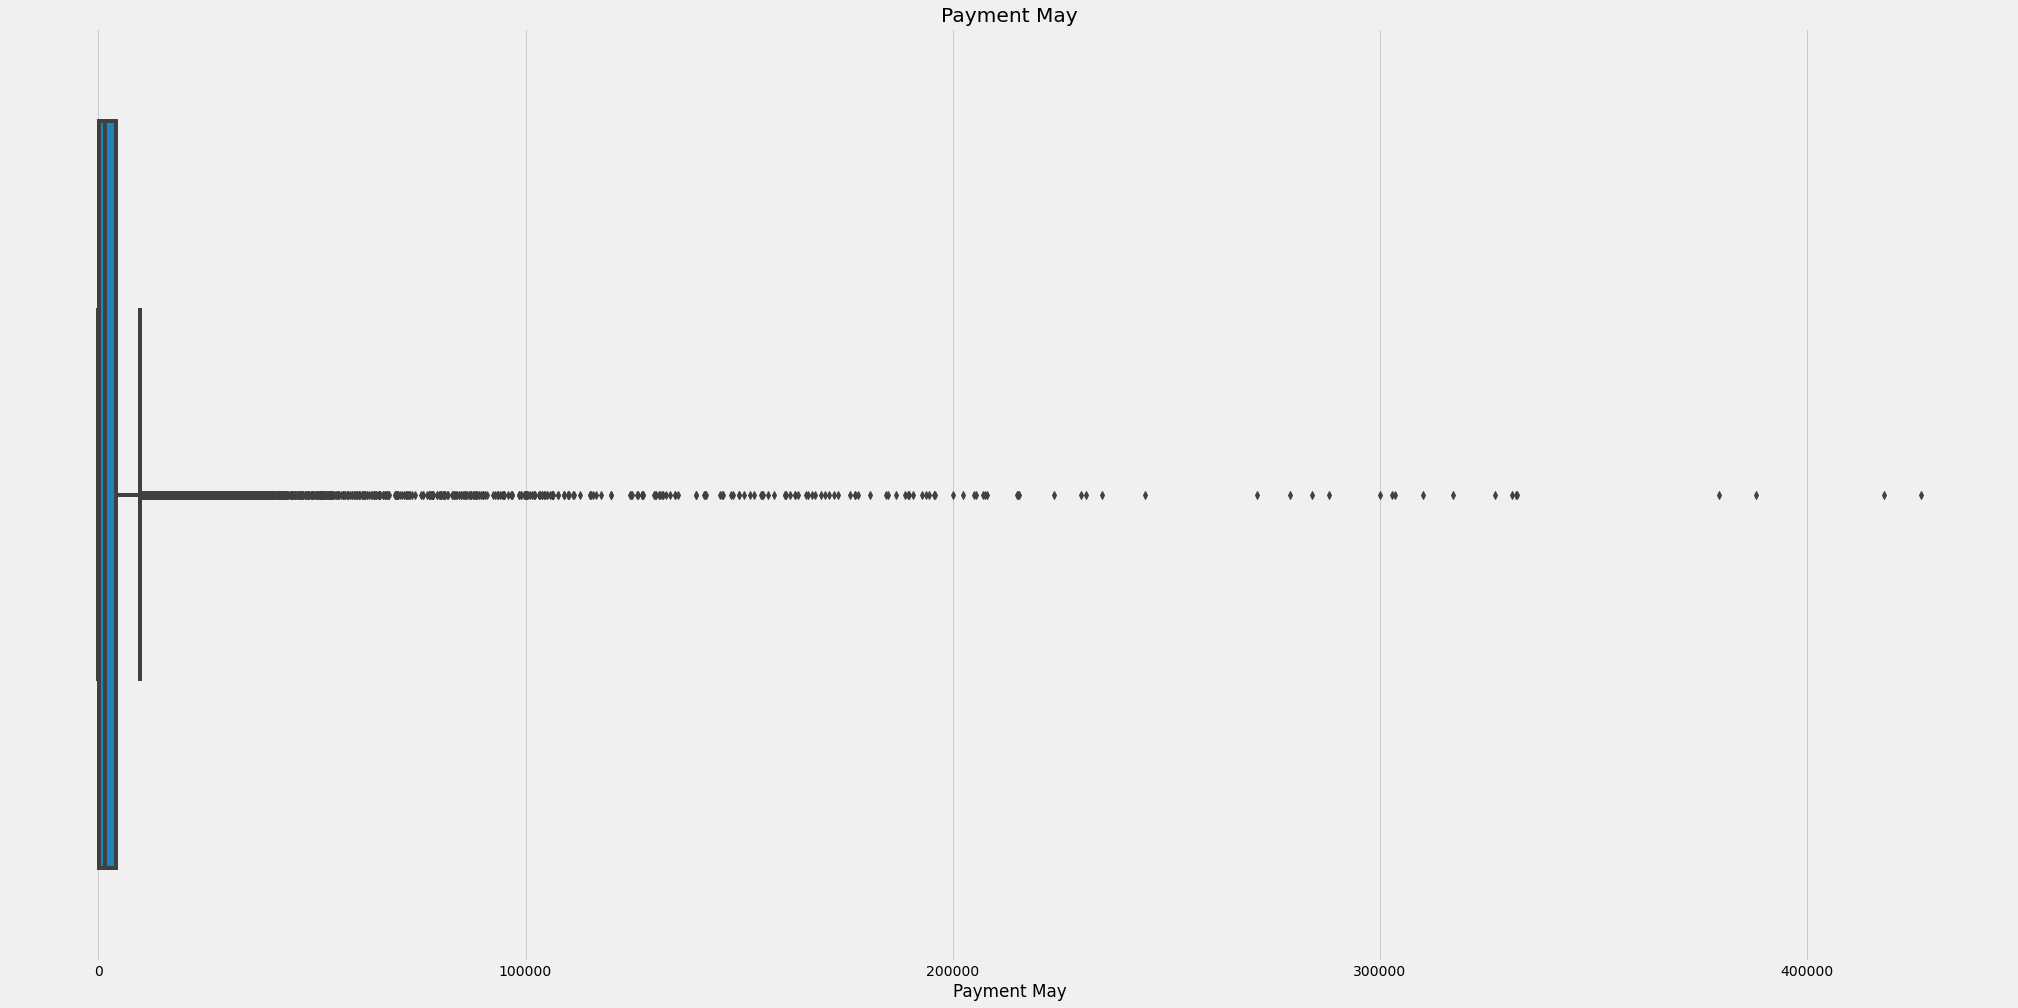

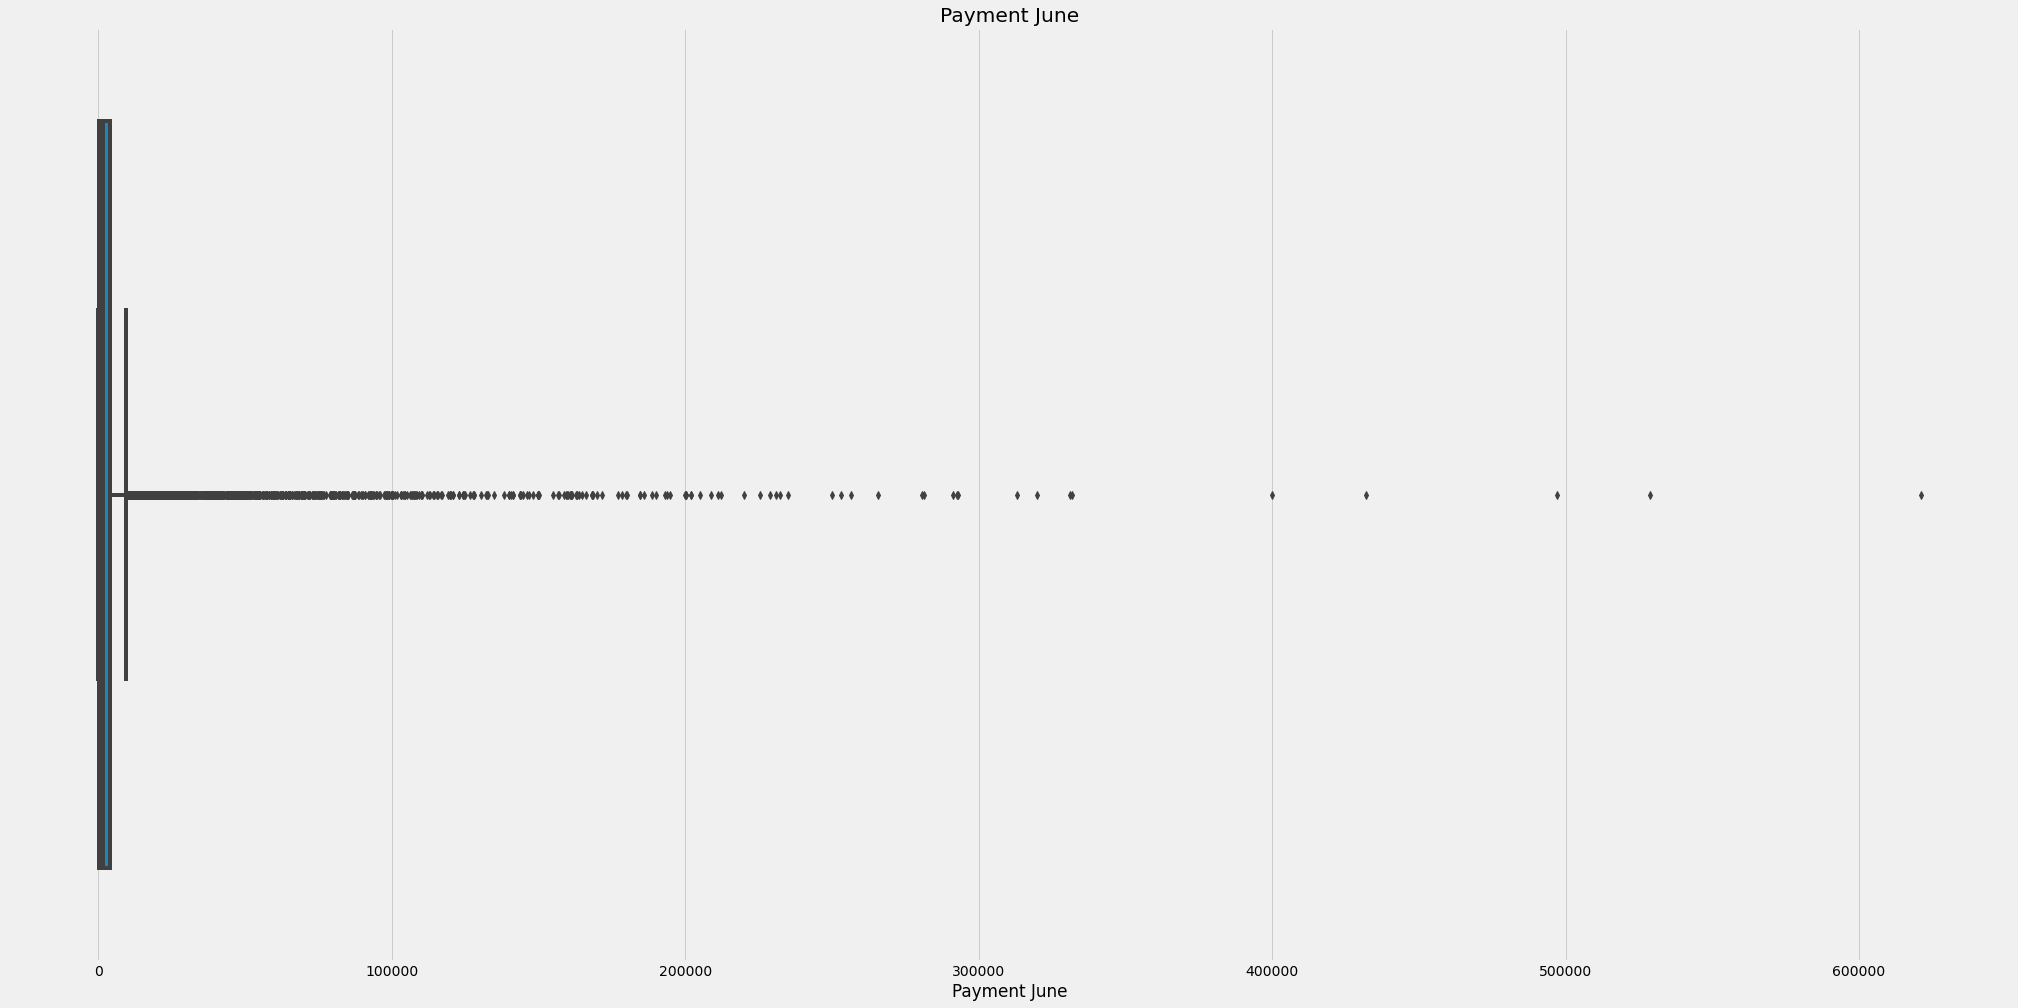

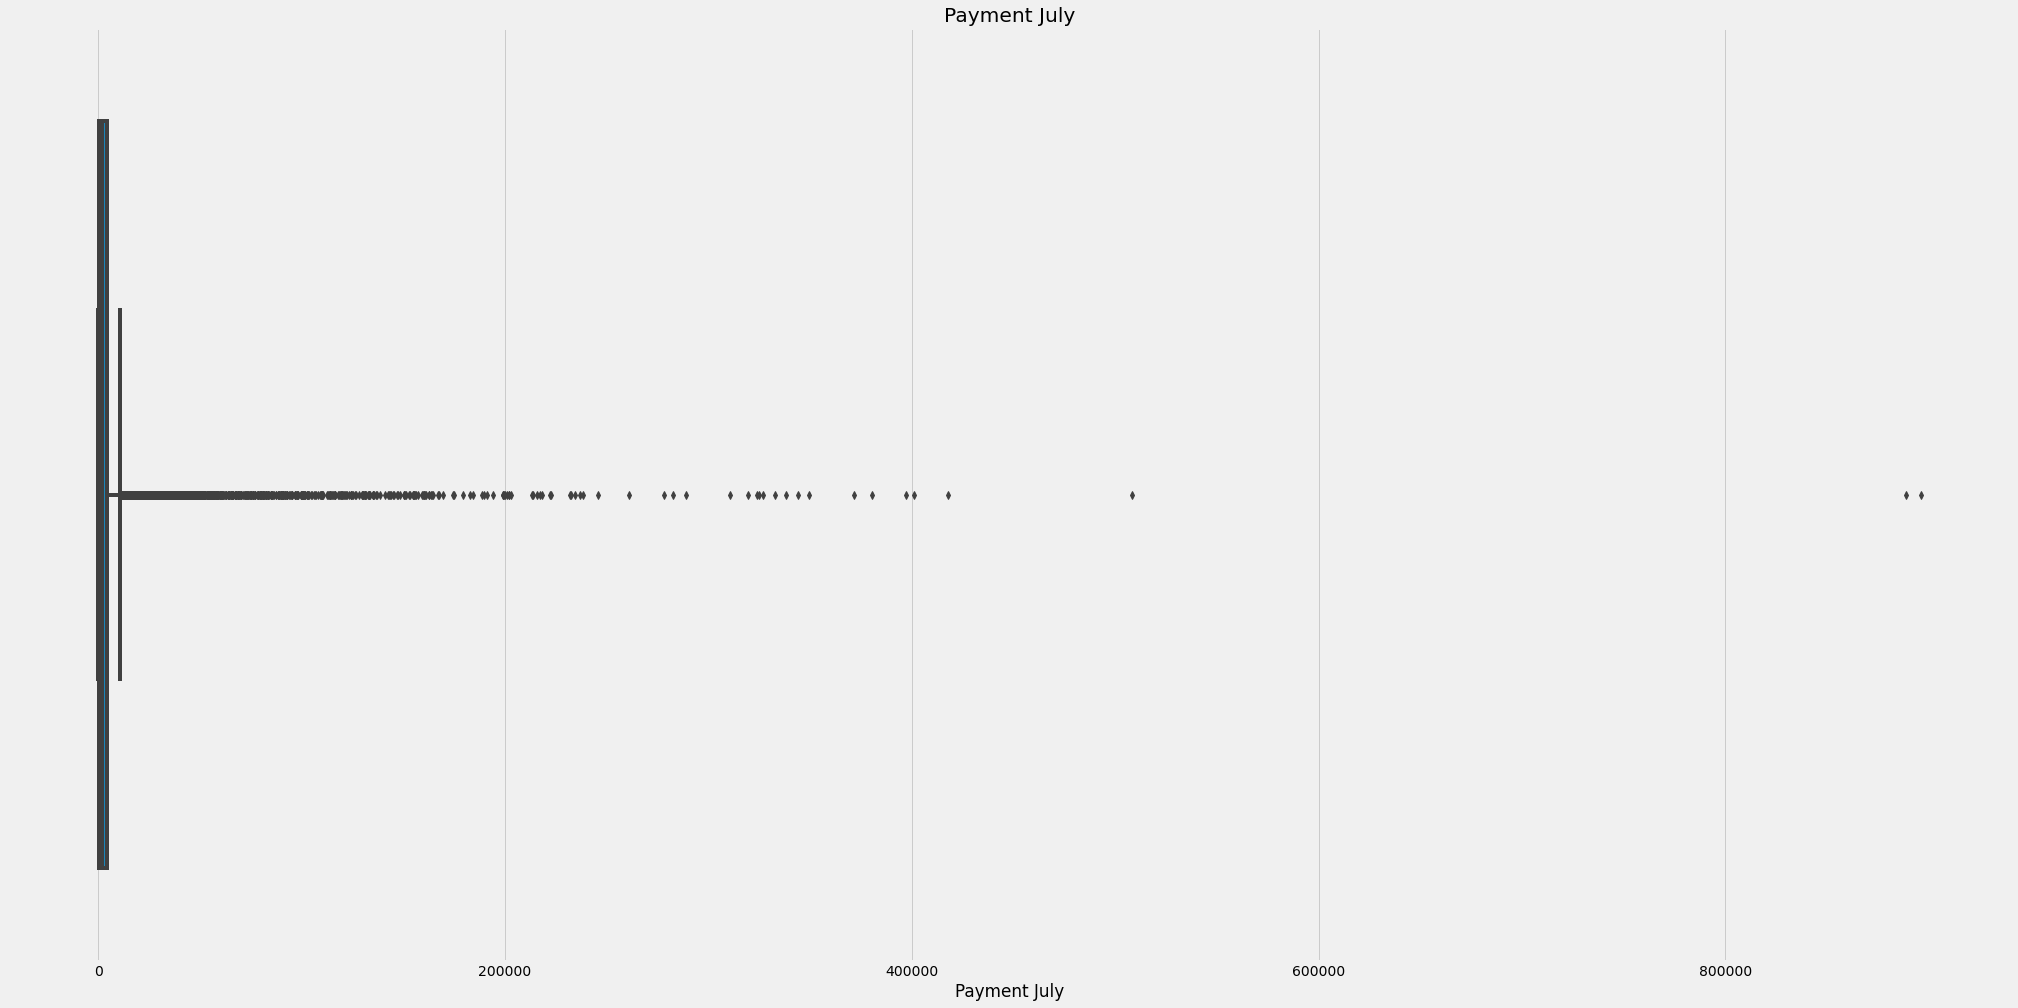

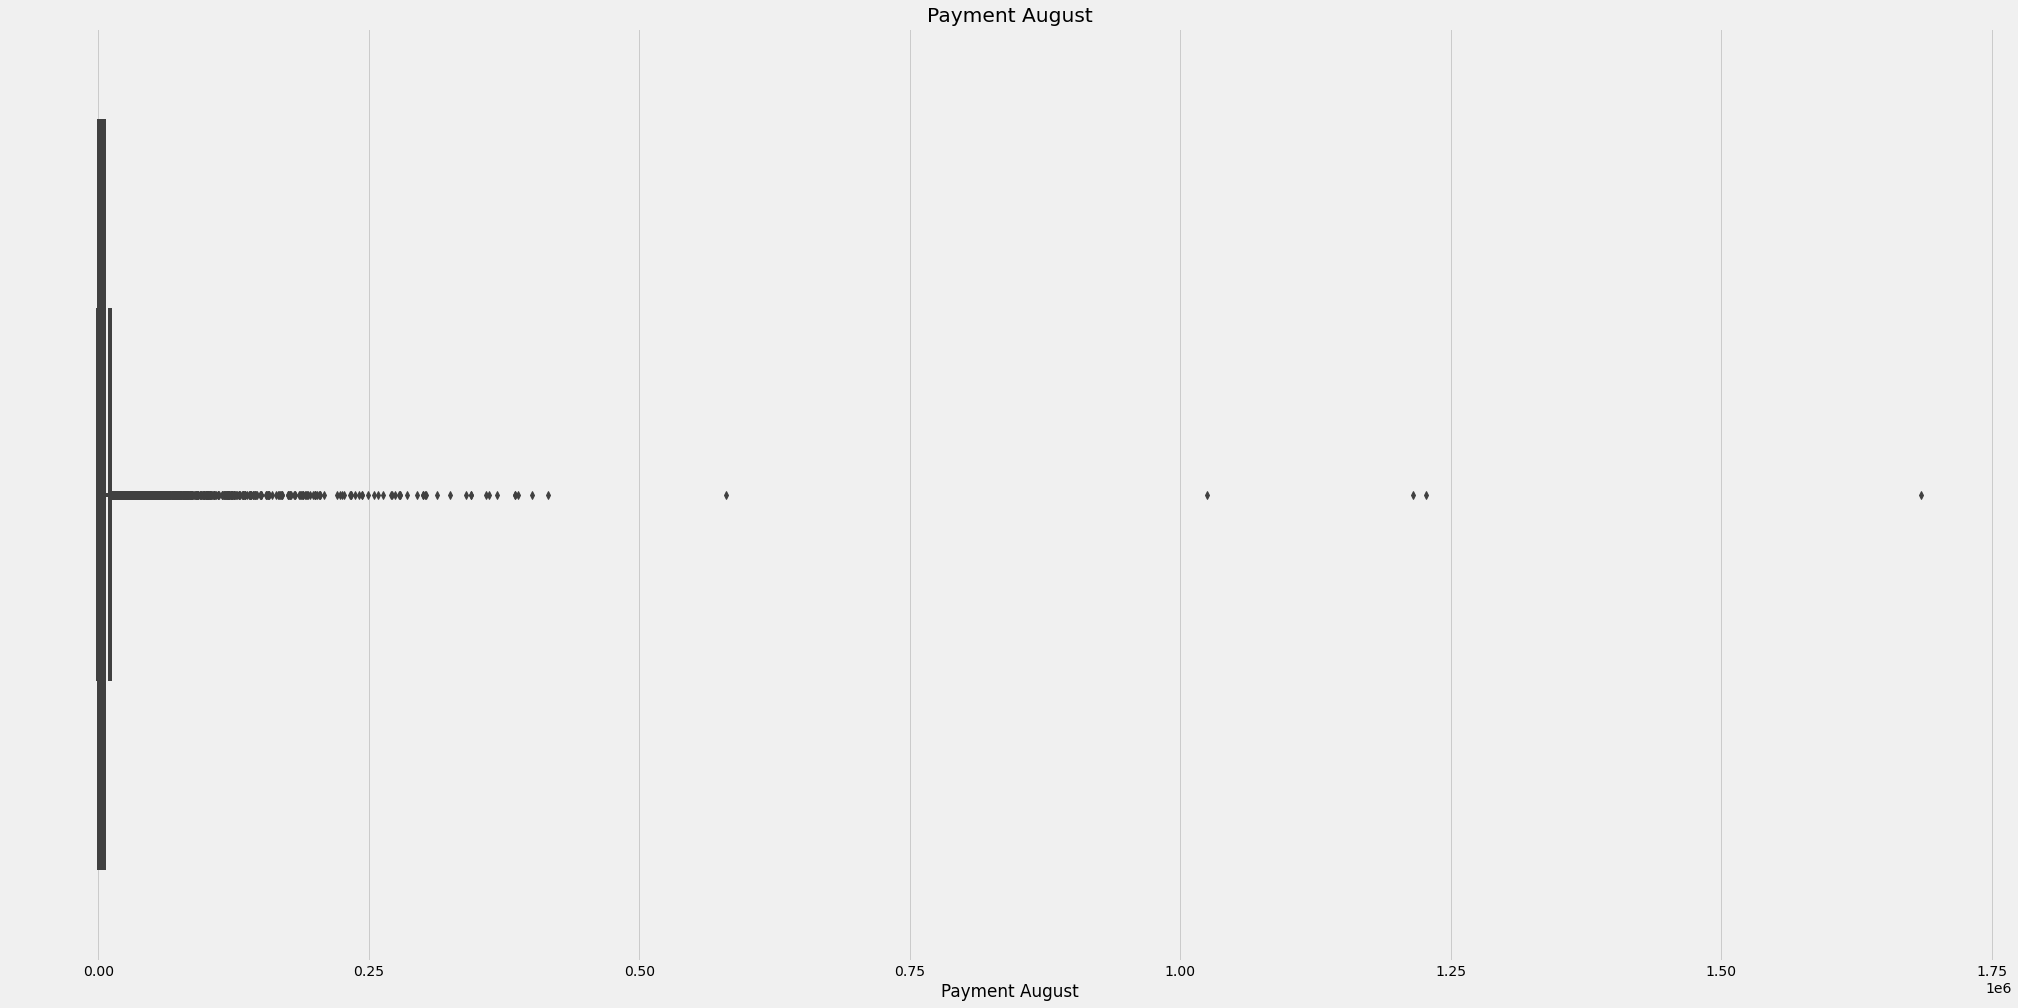

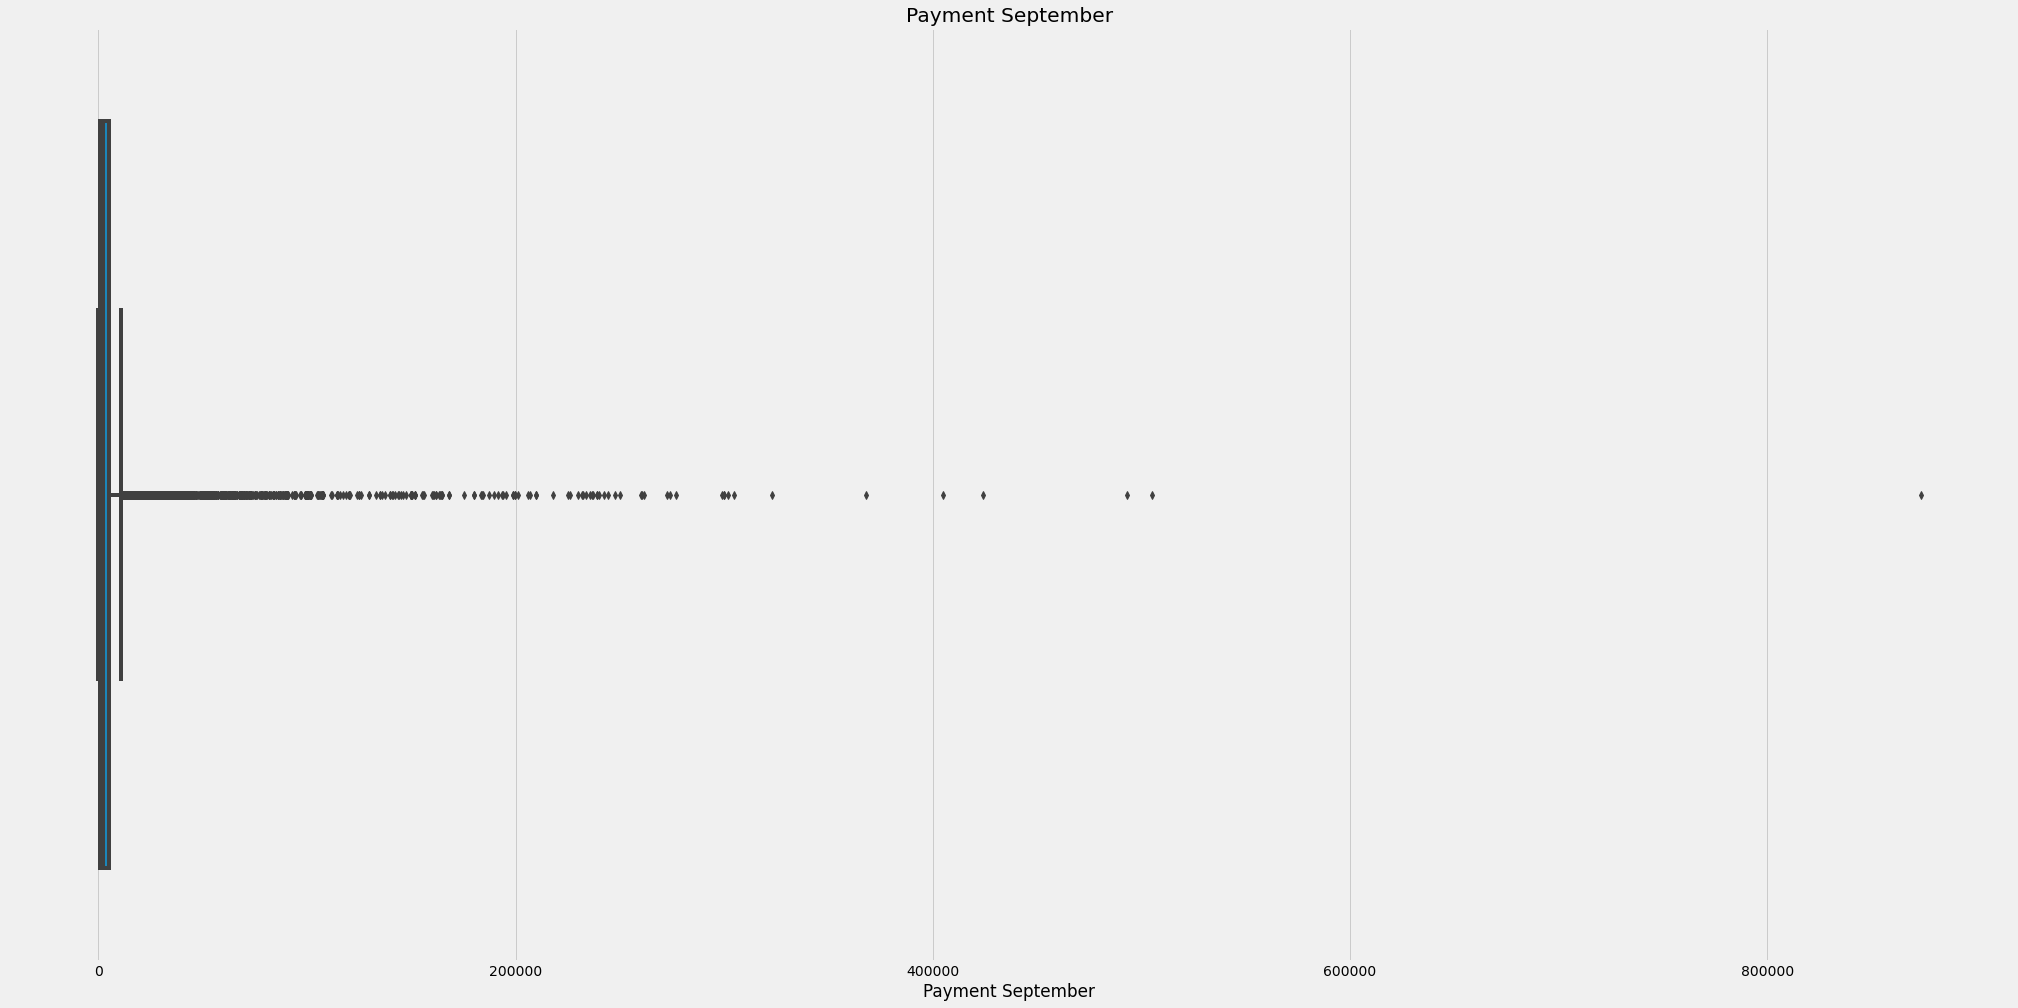

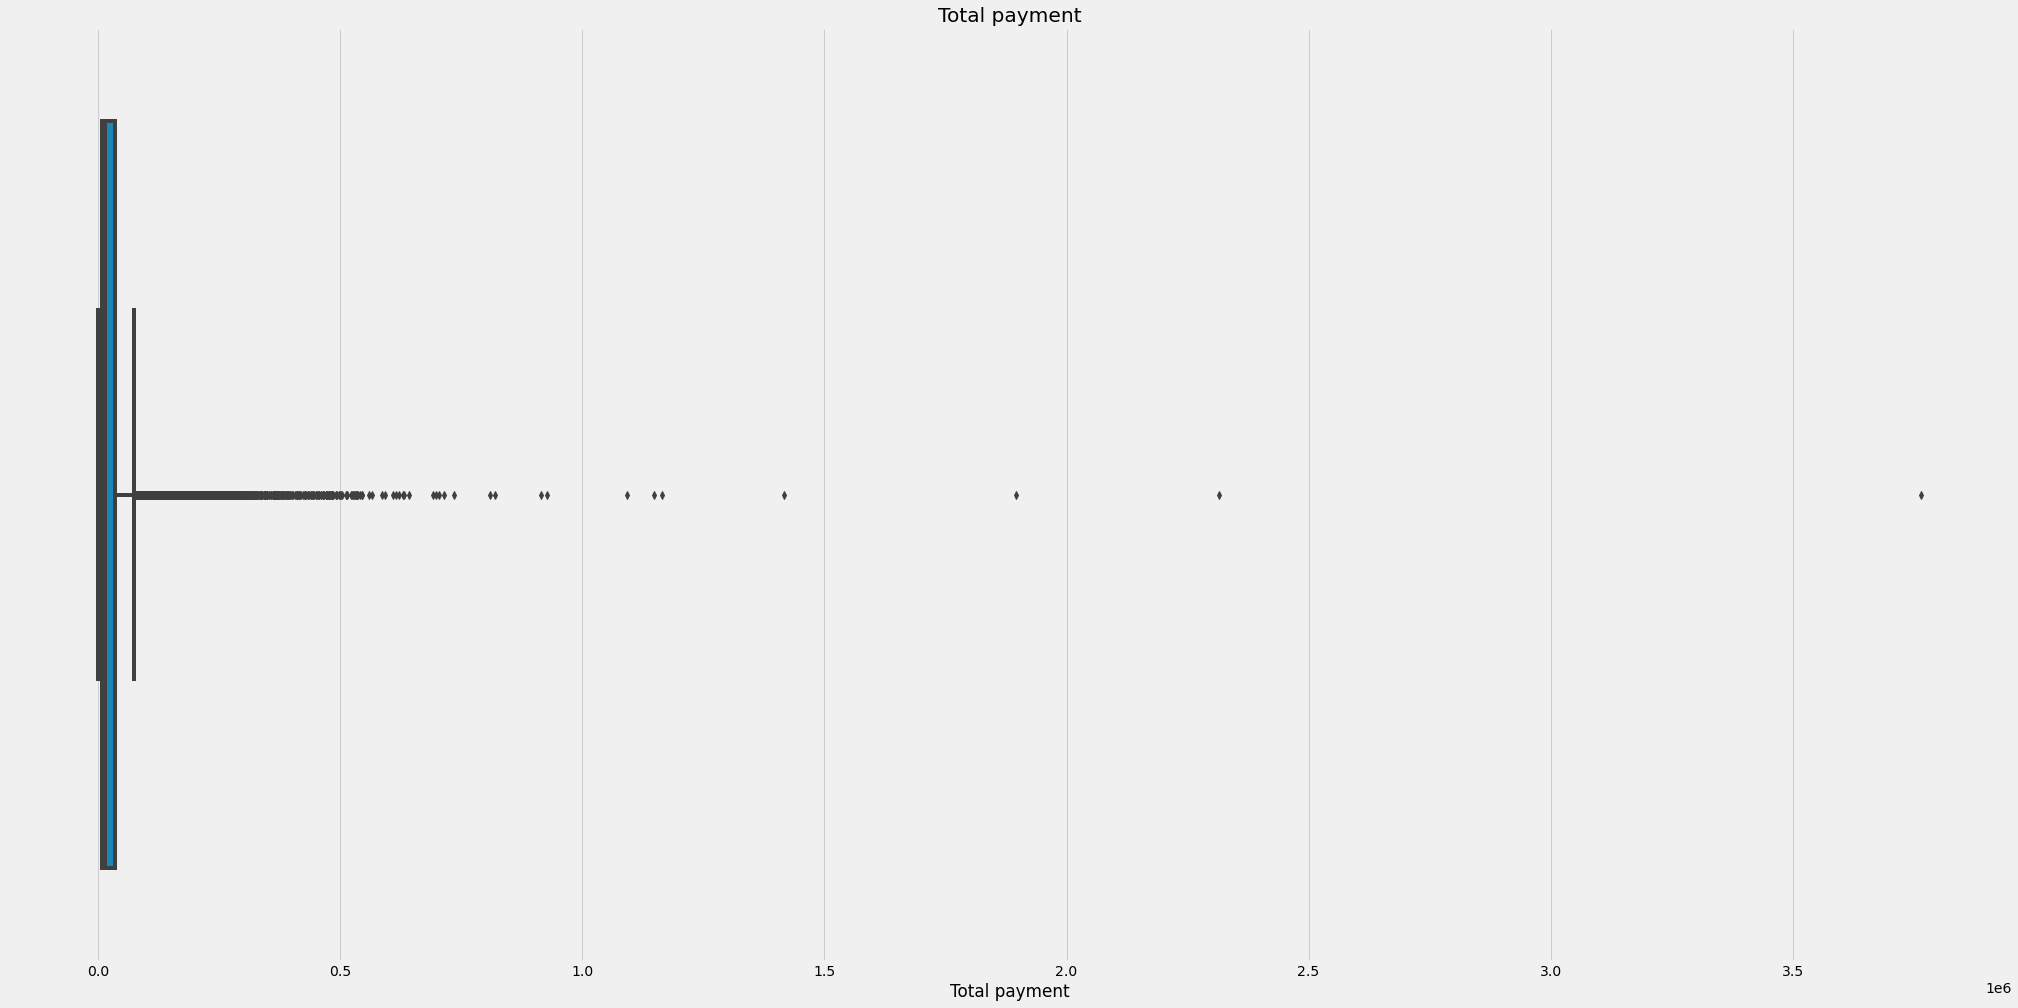

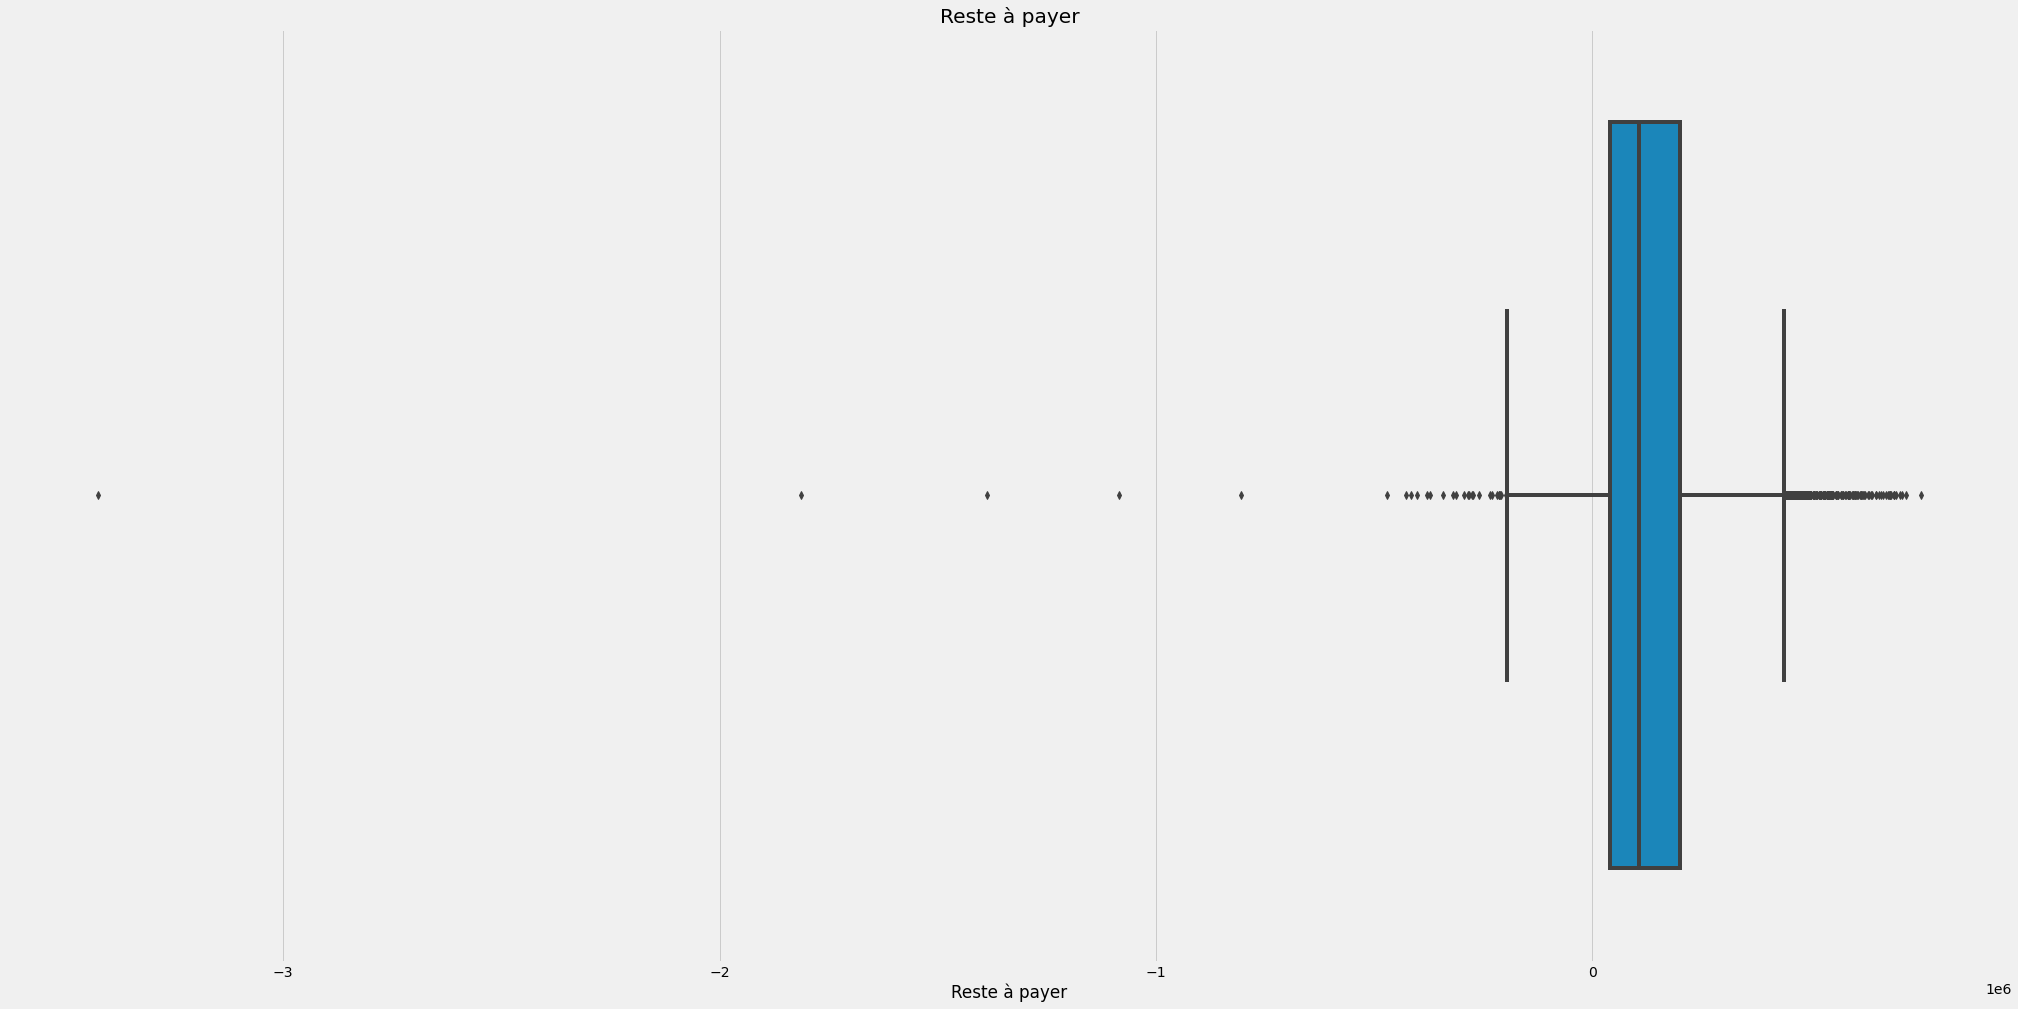

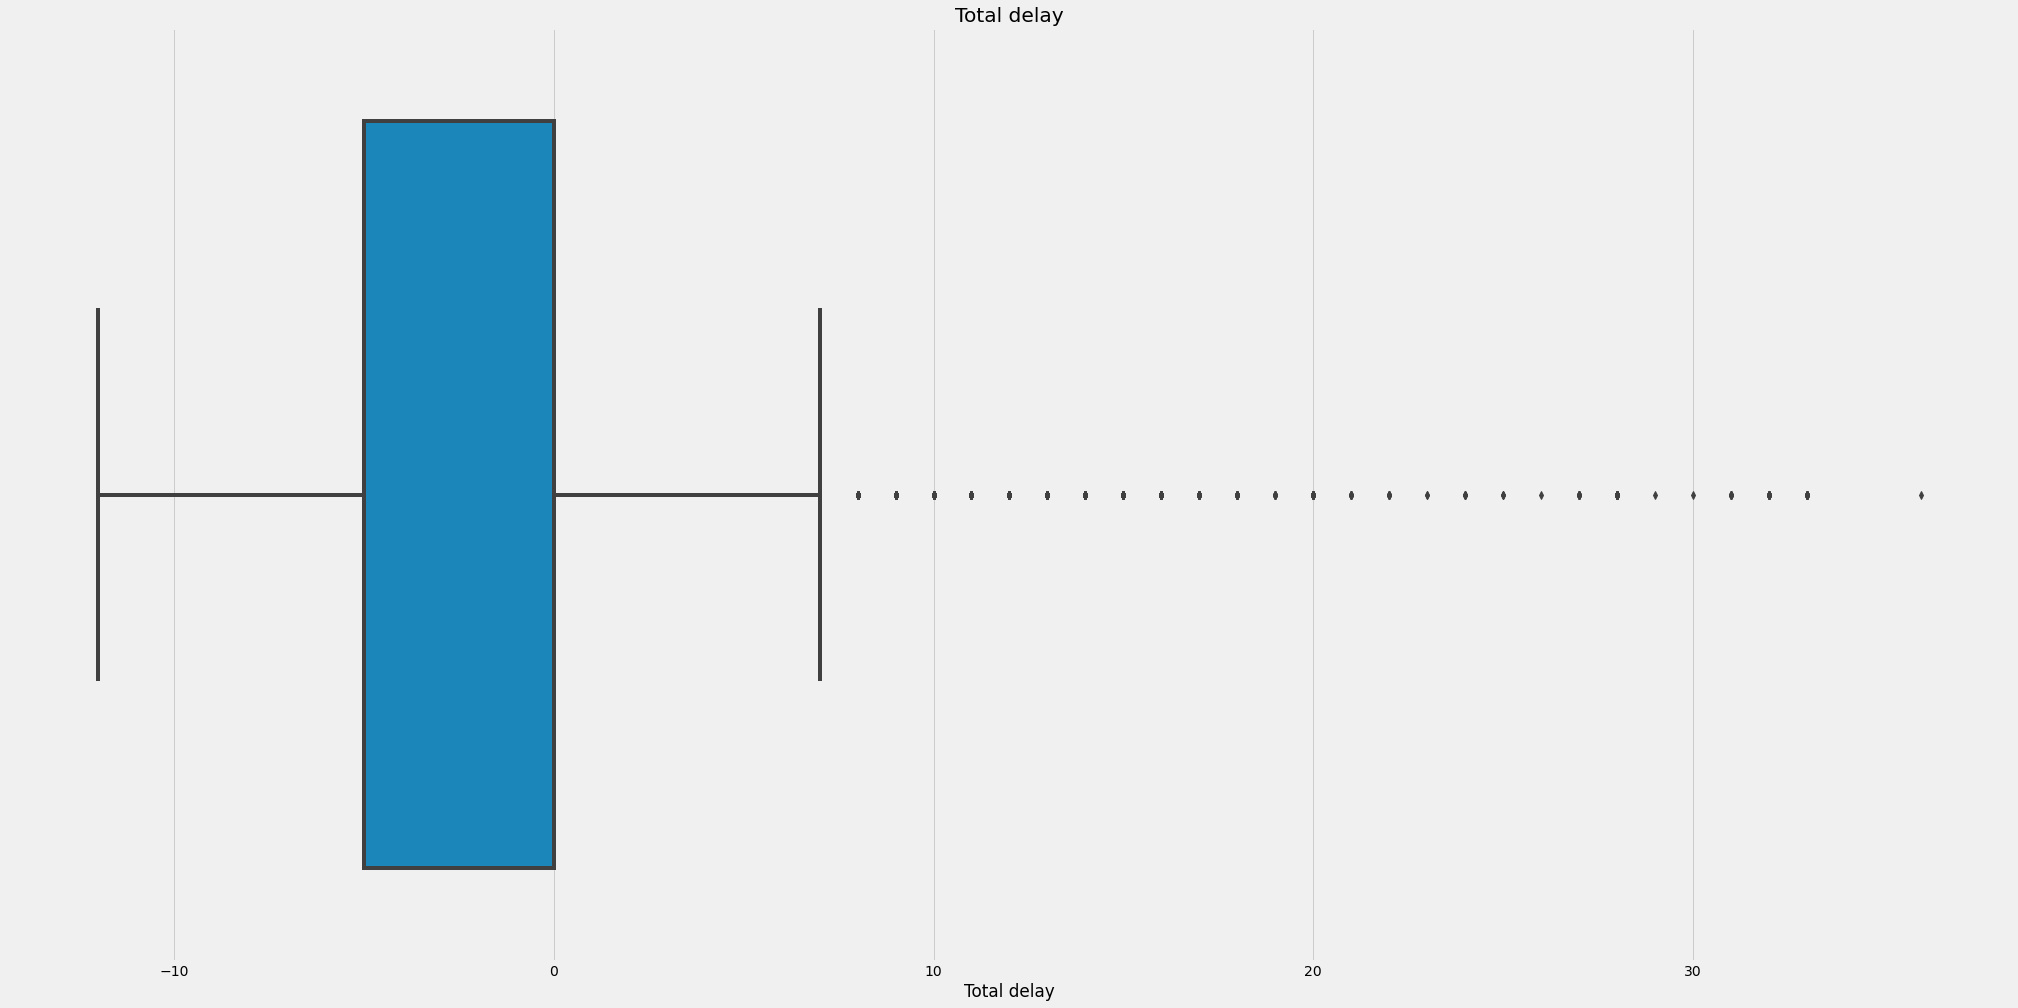

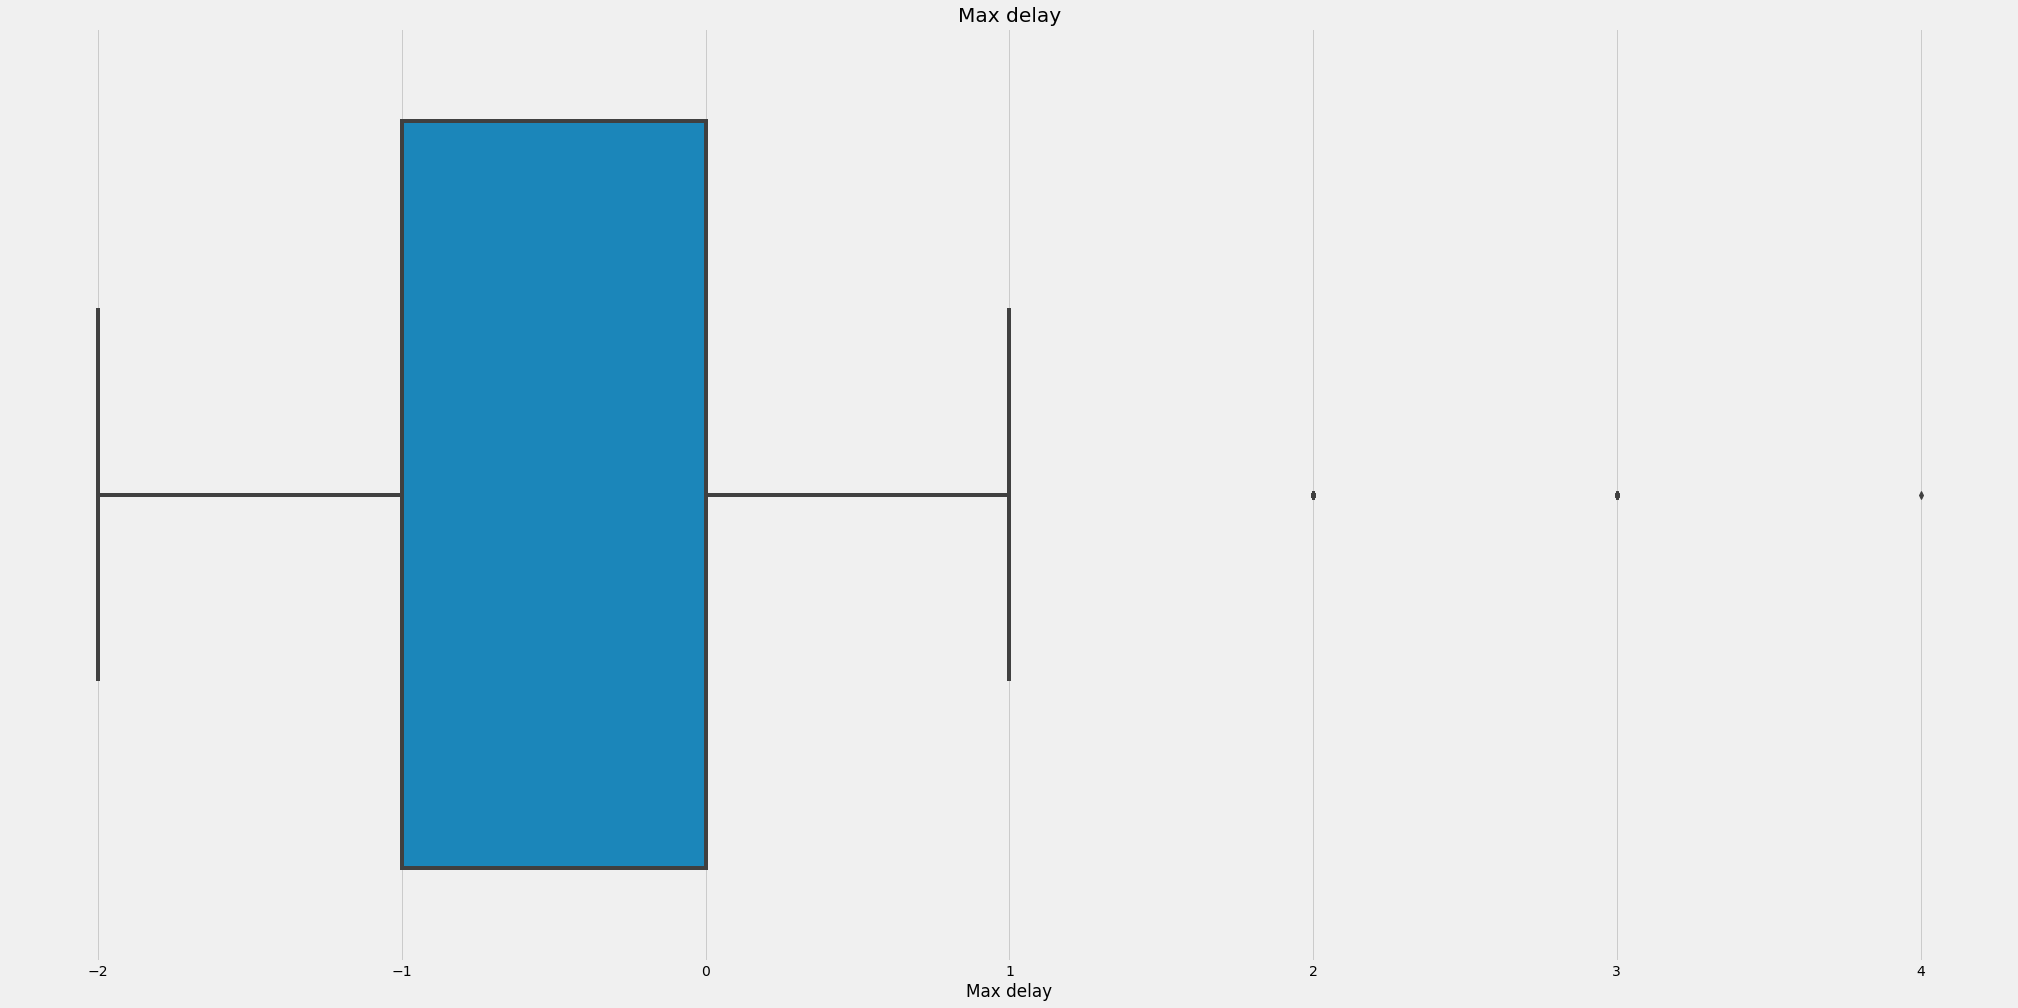

In [37]:
for feature in cont_features:
    plt.figure(figsize=(32,16))
    sns.boxplot(x=feature, data=Bad_payers, hue=target)
    plt.title(feature)
    plt.show()

# Pré-Traitement

In [38]:
# Bad_payers = Bad_payers[Bad_payers['X4: MARRIAGE'] > 0] 
# On retire la valeur 0 pour le mariqge non définit dans la descrition du dataset
Bad_payers = Bad_payers[Bad_payers['X1: LIMIT_BAL'] < 700000]
# On retire les valeurs abérantes au dessus de 800k car trop sous représenté dans le datatset

# X_train, X_test, y_train, y_test

In [39]:
X = Bad_payers.drop(target, axis=1)
y = Bad_payers[target]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
len(y_train), len(y_test)

(20953, 8981)

In [42]:
X_train.head()

,X1: LIMIT_BAL,Delay April,Delay May,Delay June,Delay July,Delay August,Delay September,Payment April,Payment May,Payment June,Payment July,Payment August,Payment September,Total payment,Reste à payer,Total delay,Max delay
11231,50000.0,0,0,0,0,0,0,5000.0,2000.0,3000.0,3000.0,2000.0,3000.0,18000.0,32000.0,0,0
29995,220000.0,0,0,0,0,0,0,1000.0,5000.0,3047.0,5003.0,20000.0,8500.0,42550.0,177450.0,0,0
12805,110000.0,-1,-1,-1,-1,-1,-1,927.0,1760.0,16070.0,2176.0,1338.0,9483.0,31754.0,78246.0,-6,-1
320,110000.0,0,0,0,2,2,1,2000.0,1854.0,2000.0,2000.0,0.0,2500.0,10354.0,99646.0,5,0
13596,200000.0,0,0,0,2,0,0,0.0,3000.0,5000.0,8000.0,0.0,3000.0,19000.0,181000.0,2,0


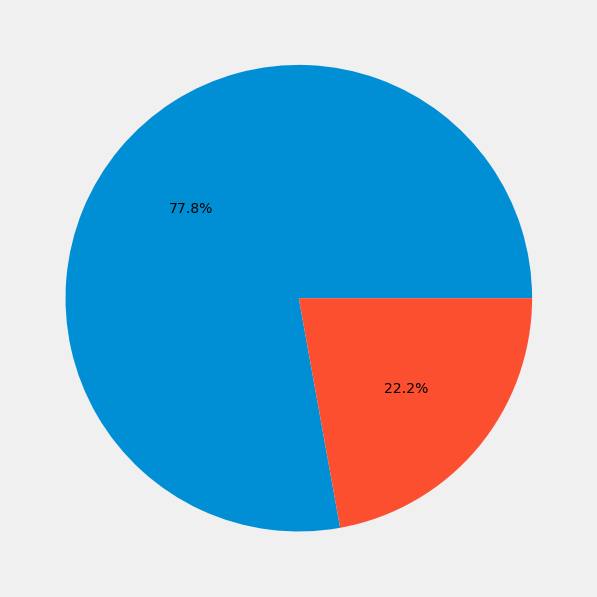

In [43]:
plt.figure(figsize=(18, 10))
plt.pie(y_train.value_counts(), autopct='%1.1f%%')
plt.show()

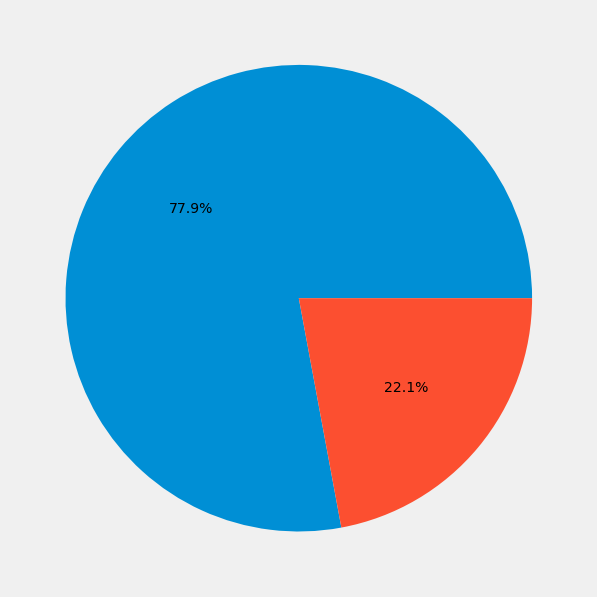

In [44]:
plt.figure(figsize=(18, 10))
plt.pie(y_test.value_counts(), autopct='%1.1f%%')
plt.show()

In [45]:
cat_features = Bad_payers.select_dtypes("int64").columns
cont_features = Bad_payers.select_dtypes(include=['float64']).columns

cont_features

Index(['X1: LIMIT_BAL', 'Payment April', 'Payment May', 'Payment June',
       'Payment July', 'Payment August', 'Payment September', 'Total payment',
       'Reste à payer'],
      dtype='object')

In [46]:
cat_features

Index(['Delay April', 'Delay May', 'Delay June', 'Delay July', 'Delay August',
       'Delay September', 'Y: default payment next month', 'Total delay',
       'Max delay'],
      dtype='object')

In [47]:
scale_minmax = MinMaxScaler()
scale_robust = RobustScaler()
# normaliser les données d'entrainement
for feature in cont_features:
    X_train[feature] = scale_minmax.fit_transform(X_train[feature].values.reshape(-1,1))
# normaliser les donnéees de test
for feature in cont_features:
    X_test[feature] = scale_minmax.fit_transform(X_test[feature].values.reshape(-1,1))

In [48]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, y_train)

# Modélisation prédictive

In [49]:
# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression

# models
logreg = LogisticRegression(penalty='none')
logregRidge = LogisticRegression(penalty='l2')
logregLasso = LogisticRegression(penalty='l1', solver='saga')
logregElasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.25)

In [50]:
dict_models = {"Reression logistique": logreg,
              "Regression logistique + Ridge": logregRidge,
              "Regression logistique + Lasso": logregLasso,
              "Regression logistique + Elastic Net": logregElasticNet
              }

# Prédiction et Evaluation

Régression logistique

Matrice de confusion:
[[5866 1132]
 [ 891 1092]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      6998
           1       0.49      0.55      0.52      1983

    accuracy                           0.77      8981
   macro avg       0.68      0.69      0.69      8981
weighted avg       0.78      0.77      0.78      8981
 

Exactitude: 77.474669 



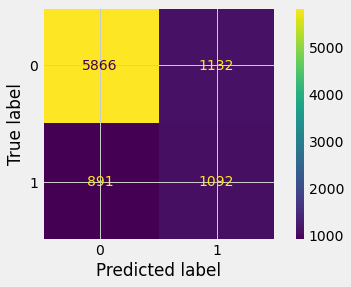

In [51]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

Régression logistique + Ridge

Matrice de confusion:
[[5769 1229]
 [ 861 1122]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      6998
           1       0.48      0.57      0.52      1983

    accuracy                           0.77      8981
   macro avg       0.67      0.70      0.68      8981
weighted avg       0.78      0.77      0.77      8981
 

Exactitude: 76.728649 



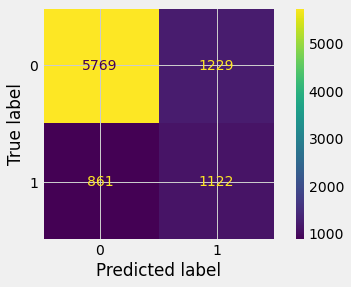

In [52]:
## régression logistique + ridge
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)

print('='*30)
print('Régression logistique + Ridge')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregRidge, X_test, y_test)
plt.show()

Régression logistique + Lasso

Matrice de confusion:
[[5580 1418]
 [ 823 1160]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      6998
           1       0.45      0.58      0.51      1983

    accuracy                           0.75      8981
   macro avg       0.66      0.69      0.67      8981
weighted avg       0.78      0.75      0.76      8981
 

Exactitude: 75.047322 



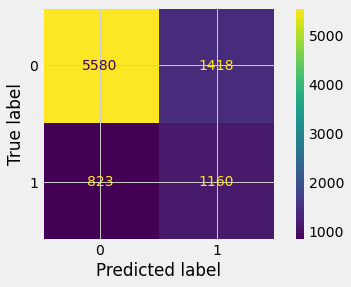

In [53]:
## régression logistique + Lasso
logregLasso.fit(X_train_up, y_train_up)
y_pred = logregLasso.predict(X_test)

print('='*30)
print('Régression logistique + Lasso')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregLasso, X_test, y_test)
plt.show()

Régression logistique + Elastic Net

Matrice de confusion:
[[5583 1415]
 [ 823 1160]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      6998
           1       0.45      0.58      0.51      1983

    accuracy                           0.75      8981
   macro avg       0.66      0.69      0.67      8981
weighted avg       0.78      0.75      0.76      8981
 

Exactitude: 75.080726 



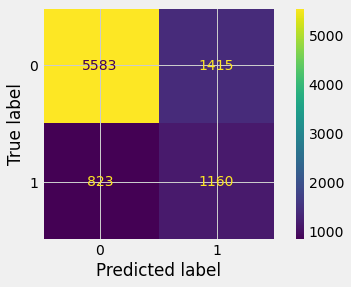

In [54]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train_up, y_train_up)
y_pred = logregElasticNet.predict(X_test)

print('='*35)
print('Régression logistique + Elastic Net')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregElasticNet, X_test, y_test)
plt.show()

In [55]:
# aire sous la courbe
roc_auc_score(y_test, y_pred)

0.6913858177475101

In [56]:
N, train_score, val_score = learning_curve(logregElasticNet, X_train, y_train,
                                            cv=5,
                                            train_sizes=np.linspace(0.1, 1, 10))

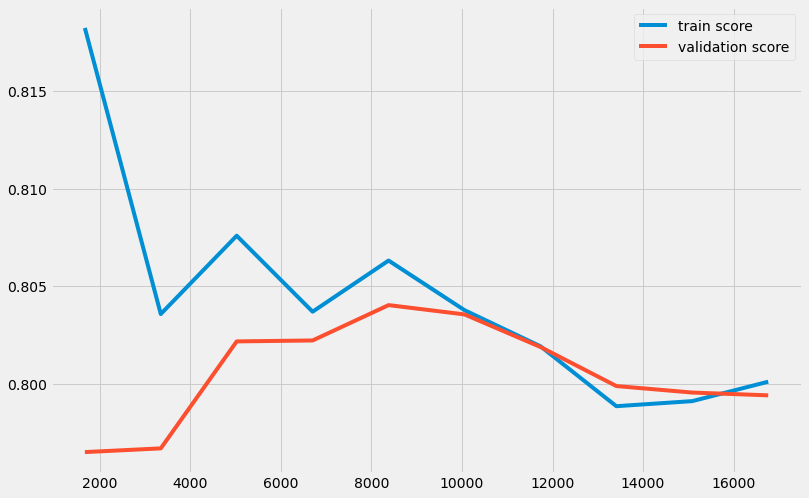

In [57]:
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

# Réglage des hypervariables

In [58]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensibilite = TP / float(TP+FN)
specificite = TN / float(TN+FP)

In [59]:
print('Exactitude = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Erreur de classification= 1- Exactitude= ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensibilité (True Positive Rate) = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificité (True Negative Rate) = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Précision (Positive Predictive value) = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n')

Exactitude = TP+TN/(TP+TN+FP+FN) =  0.774746687451286 
 Erreur de classification= 1- Exactitude=  0.22525331254871395 
 Sensibilité (True Positive Rate) = TP/(TP+FN) =  0.5506807866868382 
 Specificité (True Negative Rate) = TN/(TN+FP) =  0.8382394969991426 
 Précision (Positive Predictive value) = TP/(TP+FP) =  0.4910071942446043 
 Negative predictive Value = TN/(TN+FN) =  0.8681367470771052 



In [60]:
y_pred_prob = logreg.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob de mort (0)','Prob de survie (1)'])
y_pred_prob_df.head()

,Prob de mort (0),Prob de survie (1)
0,0.715957,0.284043
1,0.467101,0.532899
2,0.903176,0.096824
3,0.886121,0.113879
4,0.650357,0.349643


In [61]:
param_grid = {'C': [0, 1 ,10], 'max_iter': range(50)}
grid = GridSearchCV(logreg, param_grid, verbose=10, n_jobs=-1, return_train_score=True)
# attention n_jobs=-1 va utiliser tous les CPUs
grid.fit(X_train_up, y_train_up)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(estimator=LogisticRegression(penalty='none'), n_jobs=-1,
             param_grid={'C': [0, 1, 10], 'max_iter': range(0, 50)},
             return_train_score=True, verbose=10)

In [62]:
grid.best_params_

{'C': 0, 'max_iter': 49}

In [63]:
grid_logreg = grid.best_estimator_

In [64]:
predictions = grid_logreg.fit(X_train, y_train)

In [65]:
grid_logreg.score(X_train, y_train)

0.8007922493199064

In [66]:
grid_logreg.score(X_test, y_test)

0.7983520766061686

Régression logistique

Matrice de confusion:
[[6872  126]
 [1685  298]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      6998
           1       0.70      0.15      0.25      1983

    accuracy                           0.80      8981
   macro avg       0.75      0.57      0.57      8981
weighted avg       0.78      0.80      0.74      8981
 

Exactitude: 79.835208 



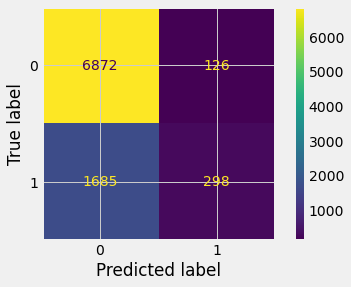

In [67]:
# performance de régression logistique avec GridSearchCV
y_pred = grid_logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(grid_logreg, X_test, y_test)
plt.show()

In [68]:
# aire sous la courbe
roc_auc_score(y_test, y_pred)

0.5661361066060657